In [19]:
# 패키지 설치 및 사용
using Pkg
Pkg.add("PyPlot")
Pkg.add("Cropbox")
Pkg.add("Garlic")
Pkg.add("CSV")
Pkg.add("DataFrames")

using Cropbox
using Garlic
using Dates
using TimeZones
using CSV
using DataFrames
import PyPlot
using Unitful
using Statistics

   Resolving package versions...
  No Changes to `/opt/julia/environments/v1.10/Project.toml`
  No Changes to `/opt/julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
  No Changes to `/opt/julia/environments/v1.10/Project.toml`
  No Changes to `/opt/julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
  No Changes to `/opt/julia/environments/v1.10/Project.toml`
  No Changes to `/opt/julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
  No Changes to `/opt/julia/environments/v1.10/Project.toml`
  No Changes to `/opt/julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
  No Changes to `/opt/julia/environments/v1.10/Project.toml`
  No Changes to `/opt/julia/environments/v1.10/Manifest.toml`


In [20]:
function svp(Tair)
    return 0.6108 * exp((17.27 * Tair) / (Tair + 237.3))
end

svp (generic function with 1 method)

In [21]:
function calculate_vpd(Tair, RH)
    Es = svp(Tair)
    return (1 - (RH / 100)) * Es
end

calculate_vpd (generic function with 1 method)

In [22]:
function modify_weather_data_origin(df::DataFrame)
    return df
end

modify_weather_data_origin (generic function with 1 method)

In [23]:
# 날씨 데이터 수정 함수
function modify_weather_data_temp(df::DataFrame; temp_increase::Float64 = 2.0)
    df = copy(df)
    if "Tair" in names(df) && "RH" in names(df)
        df[!, :origin_vpd] = calculate_vpd.(df.Tair, df.RH)
        df[!, :Tair] .+= temp_increase  
        df[!, :RH] .= 100 .* (1 .- df.origin_vpd ./ svp.(df.Tair)) 
        df[!, :upTemp_vpd] = calculate_vpd.(df.Tair, df.RH) # 검토용
    else
        println("필요한 열 'Tair' 또는 'RH'가 데이터에 없습니다.")
    end
    return df
end

modify_weather_data_temp (generic function with 1 method)

In [24]:
function modify_weather_data_vpd(df::DataFrame; temp_increase::Float64 = 2.0)
    df = copy(df)
    if "Tair" in names(df) && "RH" in names(df)
        df[!, :origin_vpd] = calculate_vpd.(df.Tair, df.RH)
        df[!, :Tair] .+= temp_increase 
        df[!, :VPD] = calculate_vpd.(df.Tair, df.RH) 
        df[!, :Tair] .-= temp_increase
        df[!, :RH] .= 100 .* (1 .- df.VPD ./ svp.(df.Tair))
    else
        println("필요한 열 'Tair' 또는 'RH'가 데이터에 없습니다.")
    end
    
    return df
end


modify_weather_data_vpd (generic function with 1 method)

In [25]:
function modify_weather_data_temp_vpd(df::DataFrame; temp_increase::Float64 = 2.0)
    df = copy(df)
    if "Tair" in names(df) && "RH" in names(df)
        df[!, :origin_vpd] = calculate_vpd.(df.Tair, df.RH)
        df[!, :Tair] .+= temp_increase
        df[!, :VPD] = calculate_vpd.(df.Tair, df.RH)
        df[!, :RH] .= 100 .* (1 .- df.VPD ./ svp.(df.Tair))
    else
        println("필요한 열 'Tair' 또는 'RH'가 데이터에 없습니다.")
    end
    
    return df
end

modify_weather_data_temp_vpd (generic function with 1 method)

In [26]:
config = @config Garlic.Examples.AoB.KM_2014_P2_SR0

Config for 8 systems:
  Phenology
    optimal_temperature           = 22.28
    ceiling_temperature           = 34.23
    critical_photoperiod          = 12
    maximum_leaf_initiation_rate  = 0.1003
    storage_temperature           = 5
    maximum_phyllochron_asymptote = 0.4421
    leaves_generic                = 10
    initial_leaves_at_harvest     = 4
    storage_days                  = 143
    planting_date                 = ZonedDateTime(2014, 11, 20, tz"America/Los_Angeles")
    emergence_date                = ZonedDateTime(2014, 12, 30, tz"America/Los_Angeles")
    scape_removal_date            = nothing
  Leaf
    maximum_elongation_rate        = 4.7
    minimum_length_of_longest_leaf = 65.0
    stay_green                     = 1.84
  Carbon
    maintenance_respiration_coefficient = 0.012
    synthesis_efficiency                = 0.8
    partitioning_table                  = [0.0 0.0 … 0.0 0.0; 0.35 0.3 … 0.0 0.1; … ; 0.05 0.0 … 0.0 0.95; 0.0 0.0 … 0.0 0.0]
  Meta
    cultivar       = :KM
    year           = 2014
    planting_group = 2
  Location
    latitude  = 47.66
    longitude = 122.29
    altitude  = 20.0
  Weather
    CO2   = 390
    store = 7454×11 DataFrame…
  Plant
    initial_planting_density = 55
  Calendar
    init = ZonedDateTime(2014, 9, 1, 1, tz"America/Los_Angeles")
    last = ZonedDateTime(2015, 7, 7, tz"America/Los_Angeles")

In [27]:
config[:Weather][:store]

7454×11 DataFrame
  Row │ year   jday   time      Tair     RH       Wind     SolRad  Rain     Ts ⋯
      │ Int64  Int64  Time      Float64  Float64  Float64  Int64   Float64  Fl ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │  2014    244  01:00:00     14.9     89.4      0.5       0      0.0     ⋯
    2 │  2014    244  02:00:00     14.9     89.4      0.5       0      0.0
    3 │  2014    244  03:00:00     14.7     89.6      0.1       0      0.0
    4 │  2014    244  04:00:00     14.6     90.5      0.0       0      0.0
    5 │  2014    244  05:00:00     15.8     86.3      0.4       0      0.0     ⋯
    6 │  2014    244  06:00:00     16.1     82.3      1.0       0      0.0
    7 │  2014    244  07:00:00     15.2     83.6      0.8       5      0.0
    8 │  2014    244  08:00:00     15.4     84.7      1.0      37      0.0
    9 │  2014    244  09:00:00     15.7     82.7      1.0      58      0.0     ⋯
   10 │  2014    244  10:00:00     16.4     81.3      1.3     191      0.0
   11 │  2014    244  11:00:00     17.3     77.2      1.1     326      0.0
  ⋮   │   ⋮      ⋮       ⋮         ⋮        ⋮        ⋮       ⋮        ⋮        ⋱
 7445 │  2015    189  05:00:00     15.1     90.1      0.0       0      0.0
 7446 │  2015    189  06:00:00     15.2     88.5      0.0      10      0.0     ⋯
 7447 │  2015    189  07:00:00     16.0     86.0      0.0      61      0.0
 7448 │  2015    189  08:00:00     18.2     74.0      0.6     183      0.0
 7449 │  2015    189  09:00:00     19.6     70.8      1.1     361      0.0
 7450 │  2015    189  10:00:00     21.1     66.8      1.2     515      0.0     ⋯
 7451 │  2015    189  11:00:00     23.0     63.0      1.5     644      0.0
 7452 │  2015    189  12:00:00     24.3     56.2      1.8     756      0.0
 7453 │  2015    189  13:00:00     25.3     52.9      2.1     826      0.0
 7454 │  2015    189  14:00:00     26.8     48.6      1.8     832      0.0     ⋯
                                                 3 columns and 7433 rows omitted

In [28]:
function create_version_directories(versions::Vector{String})
    for version in versions
        if !isdir(version)
            mkdir(version)
        end
    end
end

create_version_directories (generic function with 1 method)

In [29]:
function save_combined_status_plot(r, year, version)
    times = DateTime.(r[!, :time])

    # 단위 제거
    green_leaf_area = ustrip.(r[!, :green_leaf_area])
    leaf_mass = ustrip.(r[!, :leaf_mass])
    bulb_mass = ustrip.(r[!, :bulb_mass])
    total_mass = ustrip.(r[!, :total_mass])

    PyPlot.figure(figsize=(18, 6))

    # Leaf Status
    PyPlot.subplot(1, 3, 1) 
    PyPlot.plot(times, r[!, :leaves_appeared], label="Leaves Appeared")
    PyPlot.plot(times, r[!, :leaves_mature], label="Leaves Mature")
    PyPlot.plot(times, r[!, :leaves_dropped], label="Leaves Dropped")
    PyPlot.xlabel("Time")
    PyPlot.ylabel("Leaf Status")
    PyPlot.title("Leaf Status over Time ($year, $version)")
    PyPlot.legend(loc="upper left")
    PyPlot.ylim(0, 14)
    PyPlot.xticks(rotation=45)

    # Green Leaf Area
    PyPlot.subplot(1, 3, 2)  
    PyPlot.plot(times, green_leaf_area, label="Green Leaf Area", color="green")
    PyPlot.xlabel("Time")
    PyPlot.ylabel("Green Leaf Area (cm^2)")
    PyPlot.title("Green Leaf Area over Time ($year, $version)")
    PyPlot.legend(loc="upper left")
    PyPlot.ylim(0, 650)
    PyPlot.xticks(rotation=45)
    

    # Mass Status
    PyPlot.subplot(1, 3, 3) 
    PyPlot.plot(times, leaf_mass, label="Leaf Mass", color="blue")
    PyPlot.plot(times, bulb_mass, label="Bulb Mass", color="orange")
    PyPlot.plot(times, total_mass, label="Total Mass", color="red")
    PyPlot.xlabel("Time")
    PyPlot.ylabel("Mass Status (g)")
    PyPlot.title("Mass Status over Time ($year, $version)")  
    PyPlot.legend(loc="upper left")
    PyPlot.ylim(0, 50)
    PyPlot.xticks(rotation=45)
    
    version_folder = joinpath(version)
    if !isdir(version_folder)
        mkdir(version_folder)
    end
    
    file_path = joinpath(version_folder, "combined_status_$(year)_v$(version).pdf")
    PyPlot.tight_layout()
    PyPlot.savefig(file_path)
    # PyPlot.show()
end


save_combined_status_plot (generic function with 1 method)

In [30]:
function run_simulation_with_modified_data(year::Int, weather_data::DataFrame, version)
    # 시뮬레이션 설정
    config = @config (
        :Calendar => (
            :init => ZonedDateTime(year, 9, 1, tz"Asia/Seoul"),
            :last => ZonedDateTime(year + 1, 6, 30, tz"Asia/Seoul"),
        ),
        :Weather => (
            :store => weather_data
        ),
        :Phenology => (
            :planting_date => ZonedDateTime(year, 11, 1, tz"Asia/Seoul")
        ),
        :Meta => (
            :version => version
        )
    )
    
    r = simulate(Garlic.Model; config, meta = :Meta, stop = "calendar.count", snap = 1u"d")
    
    target_date = ZonedDateTime(year + 1, 5, 15, tz"Asia/Seoul")
    filtered_data = filter(row -> row[:time] == target_date, r)
    biomass_value = isempty(filtered_data) ? missing : ustrip(filtered_data[1, :bulb_mass])
    leaf_count = isempty(filtered_data) ? missing : ustrip(filtered_data[1, :leaves_mature])
    leaf_area = isempty(filtered_data) ? missing : ustrip(filtered_data[1, :green_leaf_area])

    return (year=year, biomass_on_may_15=biomass_value, leaves_on_may_15=leaf_count, leaf_area_on_may_15=leaf_area, r=r)
end

run_simulation_with_modified_data (generic function with 1 method)

In [31]:
function save_results_to_csv(results::Vector{NamedTuple}, output_file::String)
    df = DataFrame(results)
    CSV.write(output_file, df)
    println("Results saved to $(output_file)")
end

save_results_to_csv (generic function with 1 method)

In [32]:
function run_all_simulations_and_save(years, output_file::String)
    results = NamedTuple[]
    versions = ["Origin", "Temp", "VPD", "All"]

    modify_funcs = Dict(
        "Origin" => modify_weather_data_origin,
        "Temp" => modify_weather_data_temp,
        "VPD" => modify_weather_data_vpd,
        "All" => modify_weather_data_temp_vpd,
    )
    
    for year in years
        df = Garlic.loadwea("101_$year.wea", tz"Asia/Seoul")
        for version in versions
            modified_weather_data = modify_funcs[version](copy(df))
            result = run_simulation_with_modified_data(year, modified_weather_data, version)
            save_combined_status_plot(result.r, year, version)
            push!(results, (year=result.year, biomass_on_may_15=result.biomass_on_may_15, 
                    leaves_on_may_15=result.leaves_on_may_15, leaf_area_on_may_15=result.leaf_area_on_may_15, version=version))
        end
    end

    save_results_to_csv(results, output_file)
end

run_all_simulations_and_save (generic function with 1 method)

Progress: 100%[===========================] Time: 0:00:06 ( 0.85 ms/it)
Progress: 100%[===========================] Time: 0:00:06 ( 0.87 ms/it)
Progress: 100%[===========================] Time: 0:00:06 ( 0.89 ms/it)
Progress: 100%[===========================] Time: 0:00:06 ( 0.91 ms/it)
Progress: 100%[===========================] Time: 0:00:06 ( 0.88 ms/it)
Progress: 100%[===========================] Time: 0:00:06 ( 0.90 ms/it)
Progress: 100%[===========================] Time: 0:00:06 ( 0.91 ms/it)
Progress: 100%[===========================] Time: 0:00:06 ( 0.95 ms/it)
Progress: 100%[===========================] Time: 0:00:06 ( 0.90 ms/it)
Progress: 100%[===========================] Time: 0:00:06 ( 0.89 ms/it)
Progress: 100%[===========================] Time: 0:00:06 ( 0.95 ms/it)
Progress: 100%[===========================] Time: 0:00:06 ( 0.88 ms/it)
Progress: 100%[===========================] Time: 0:00:06 ( 0.87 ms/it)
Progress: 100%[===========================] Time: 0:00:06 ( 0.90

Results saved to simulation_results.csv


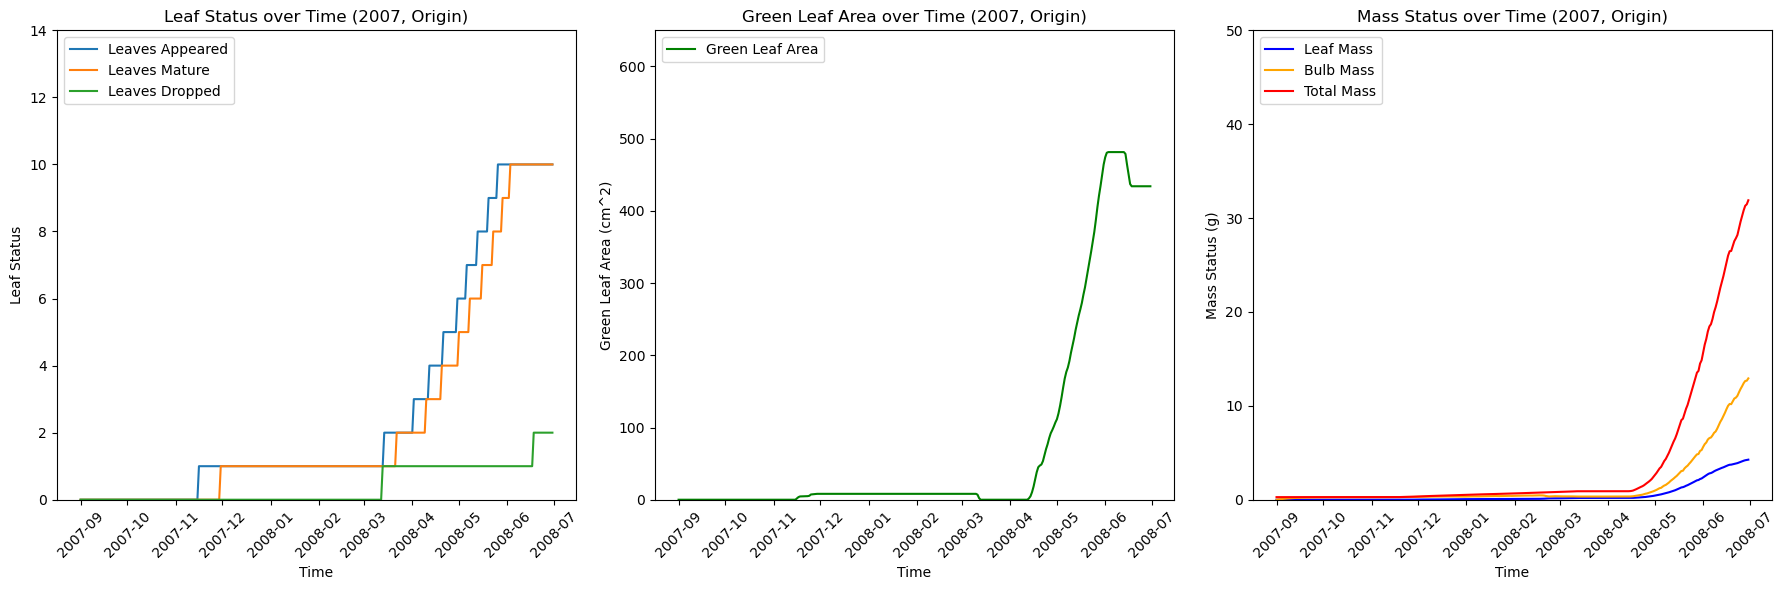

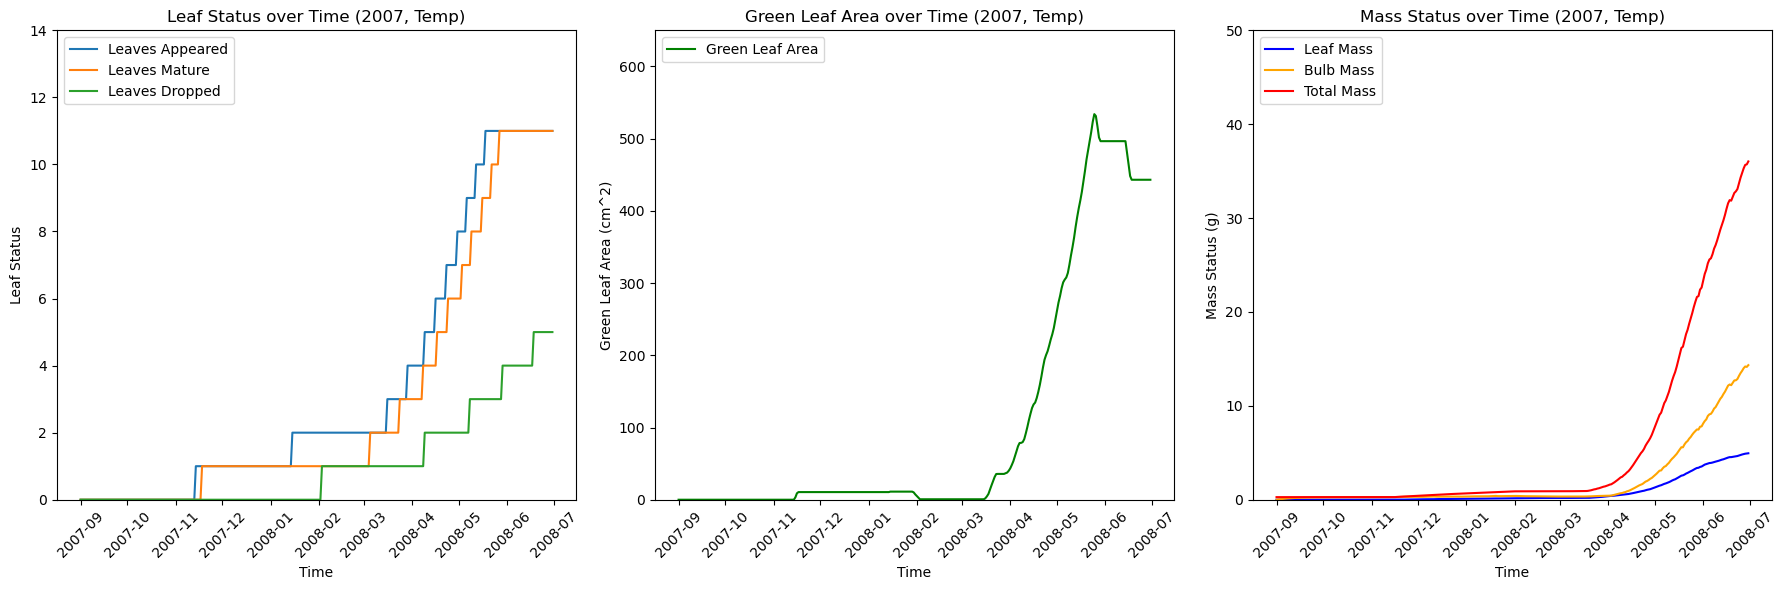

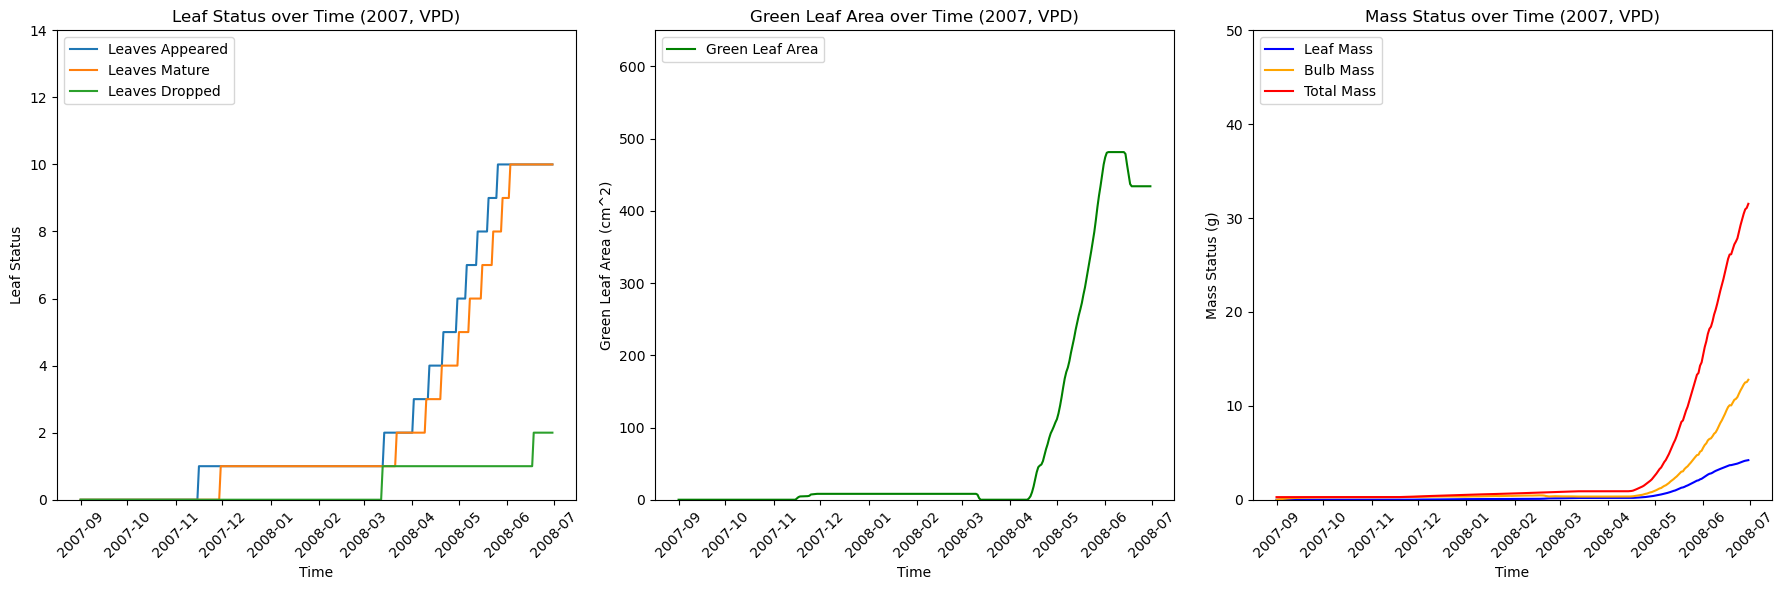

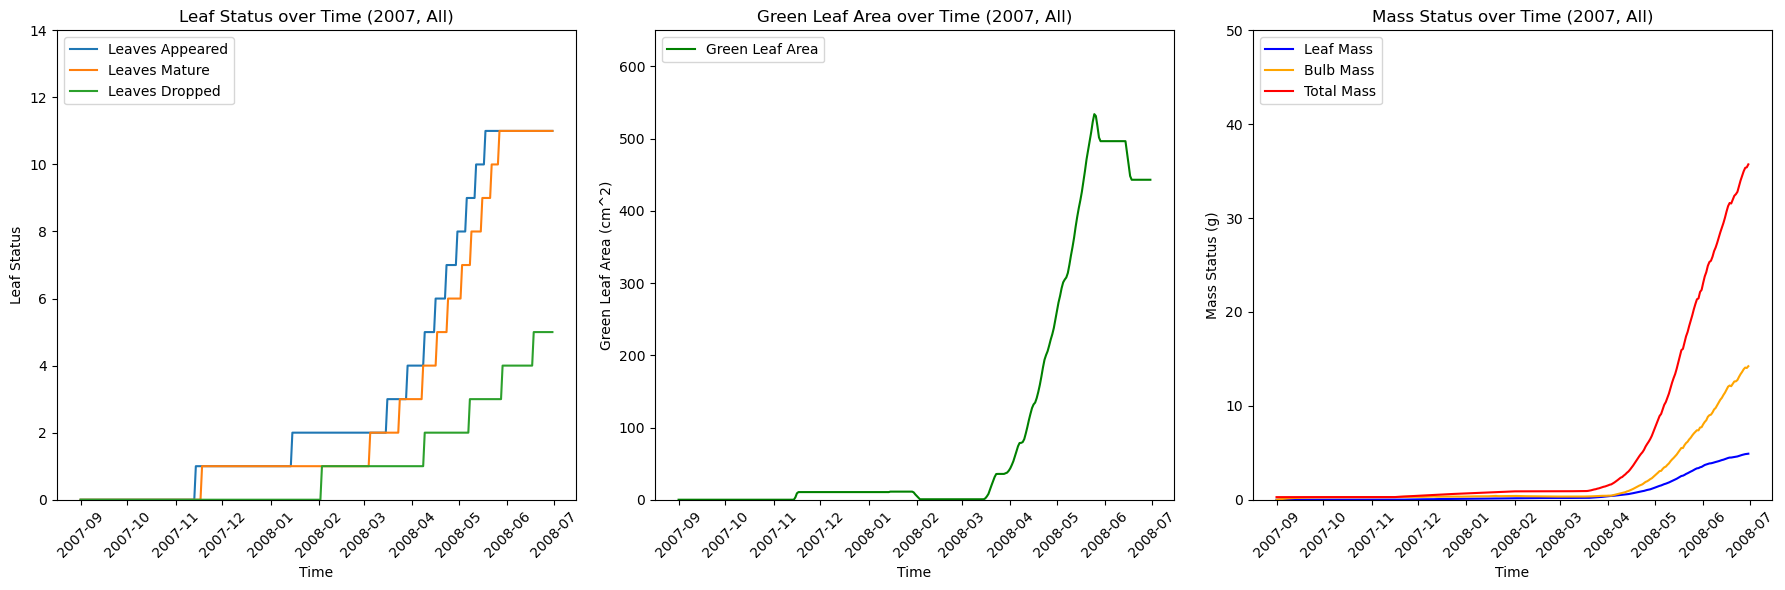

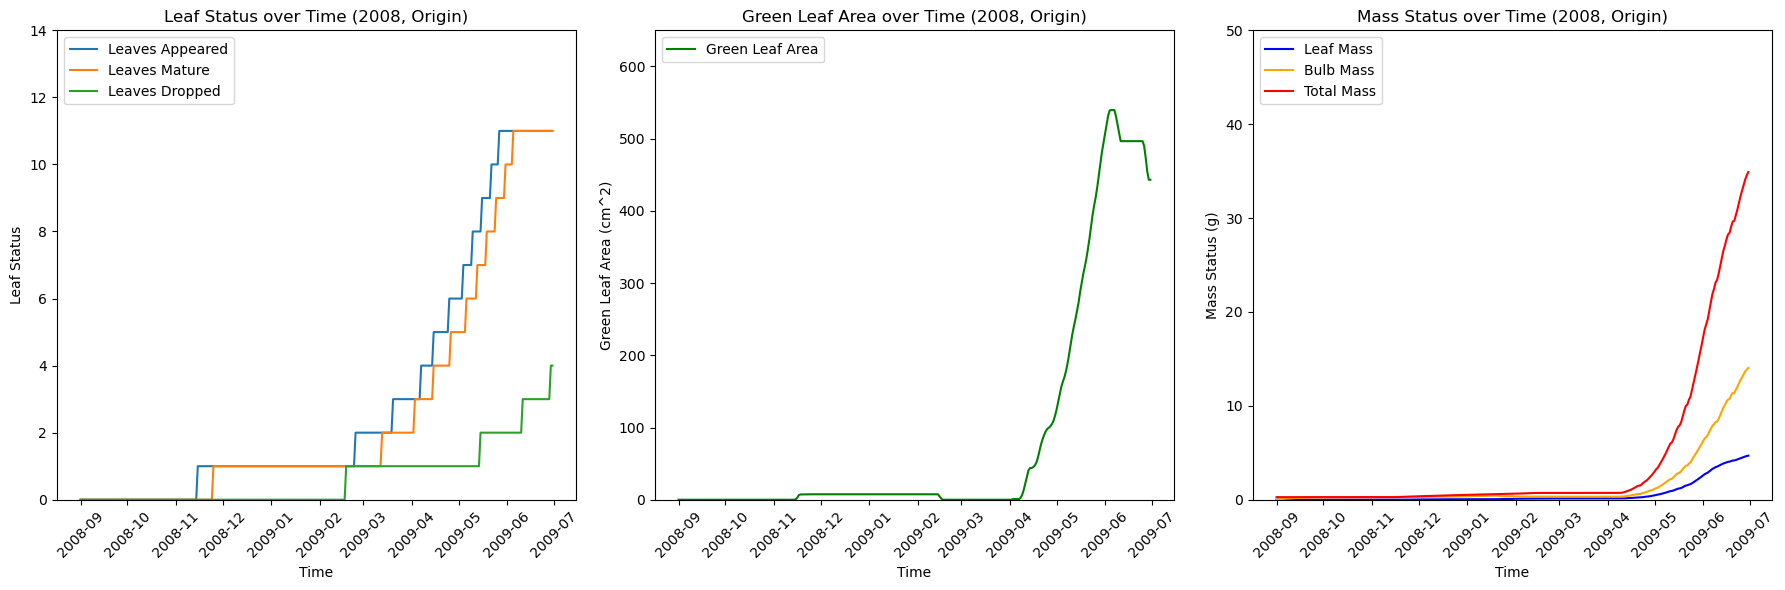

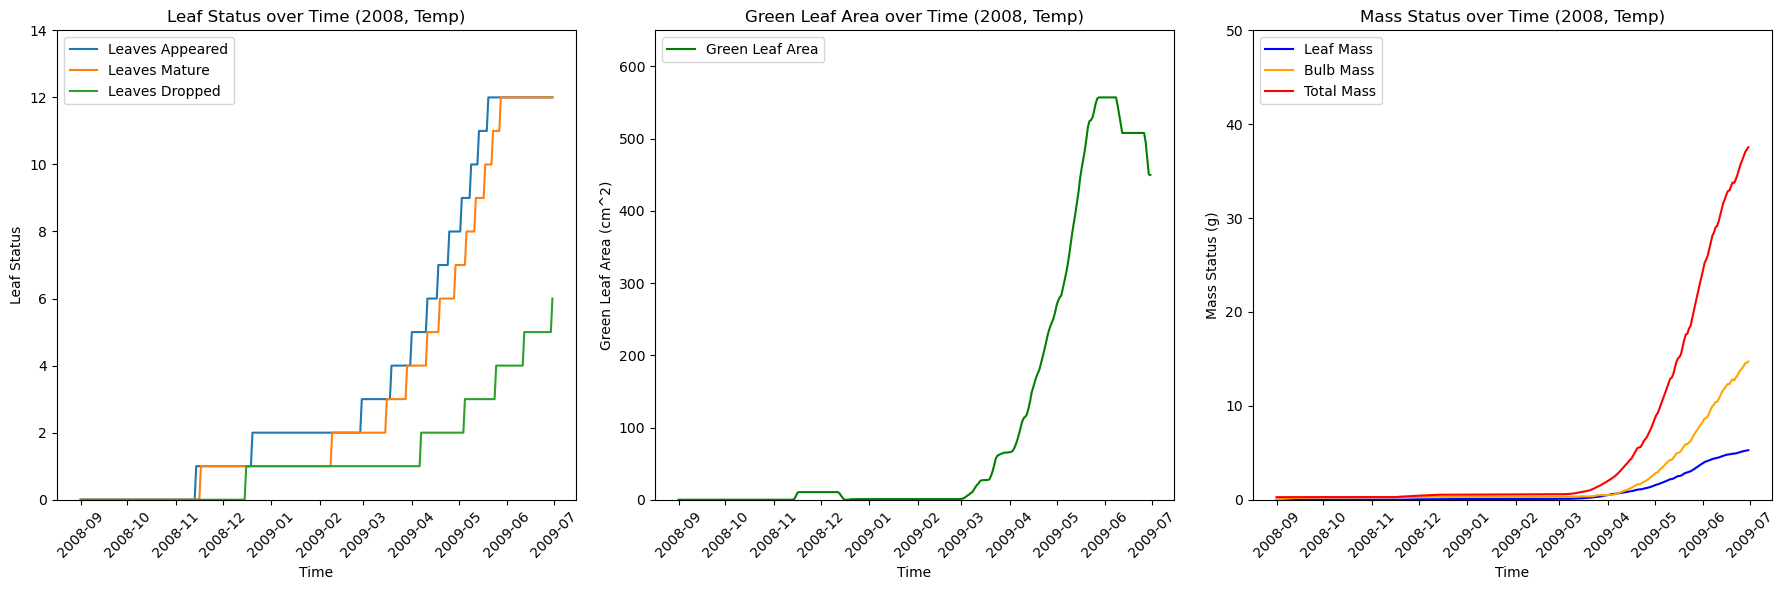

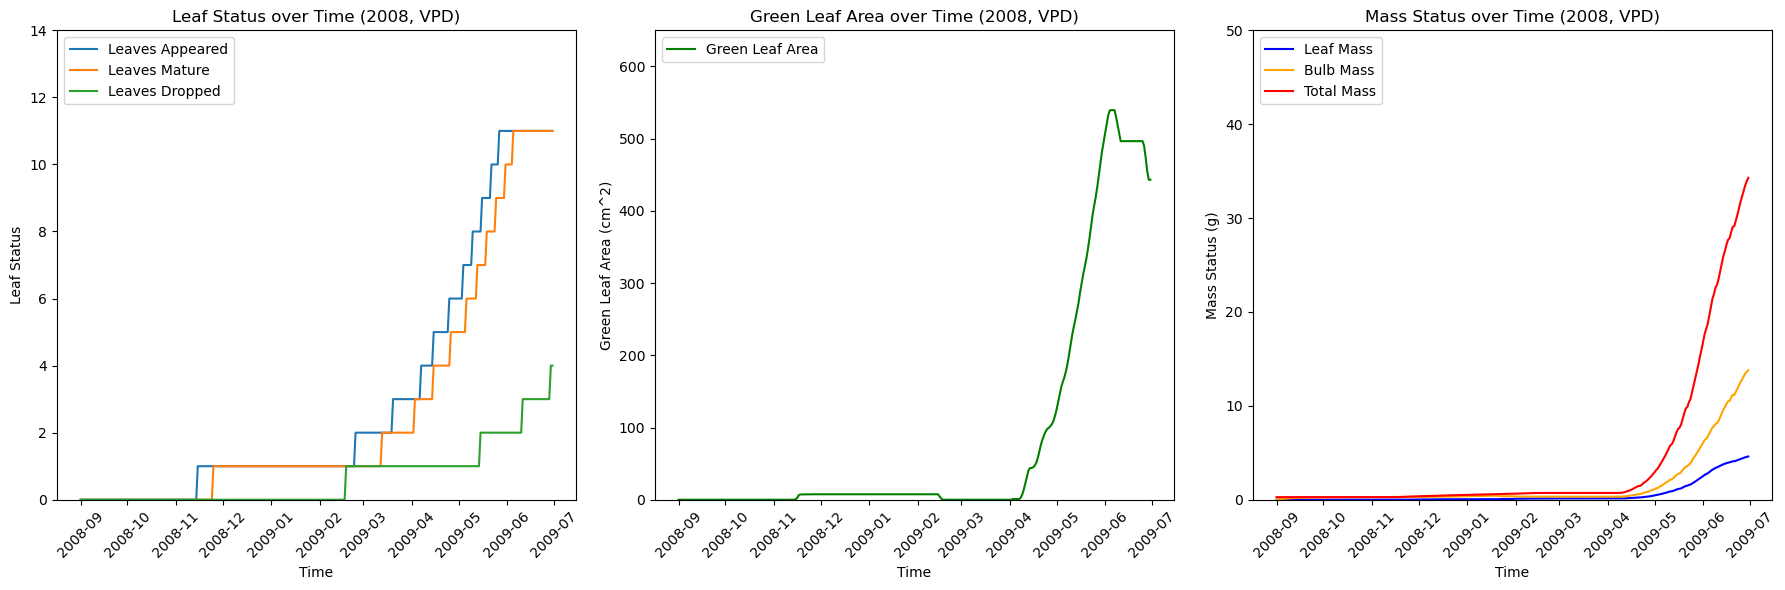

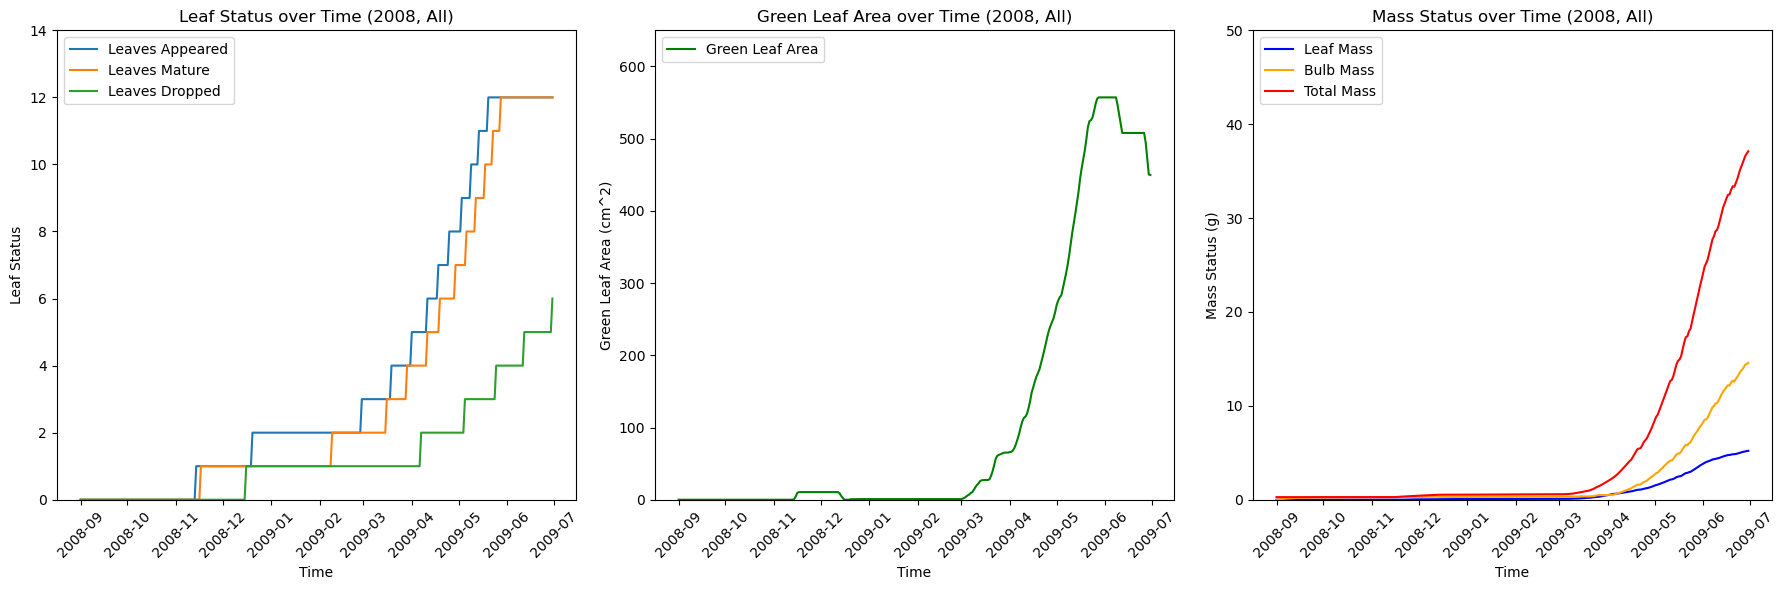

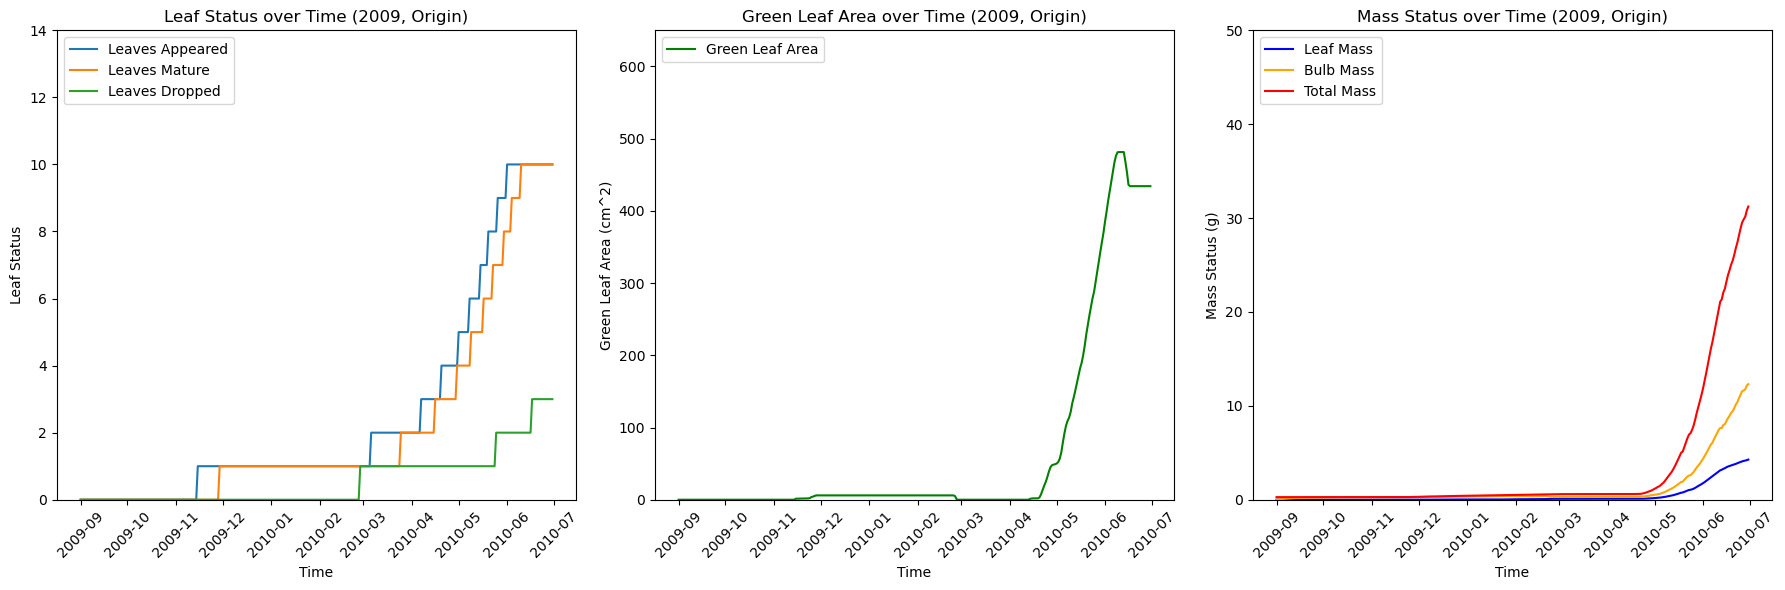

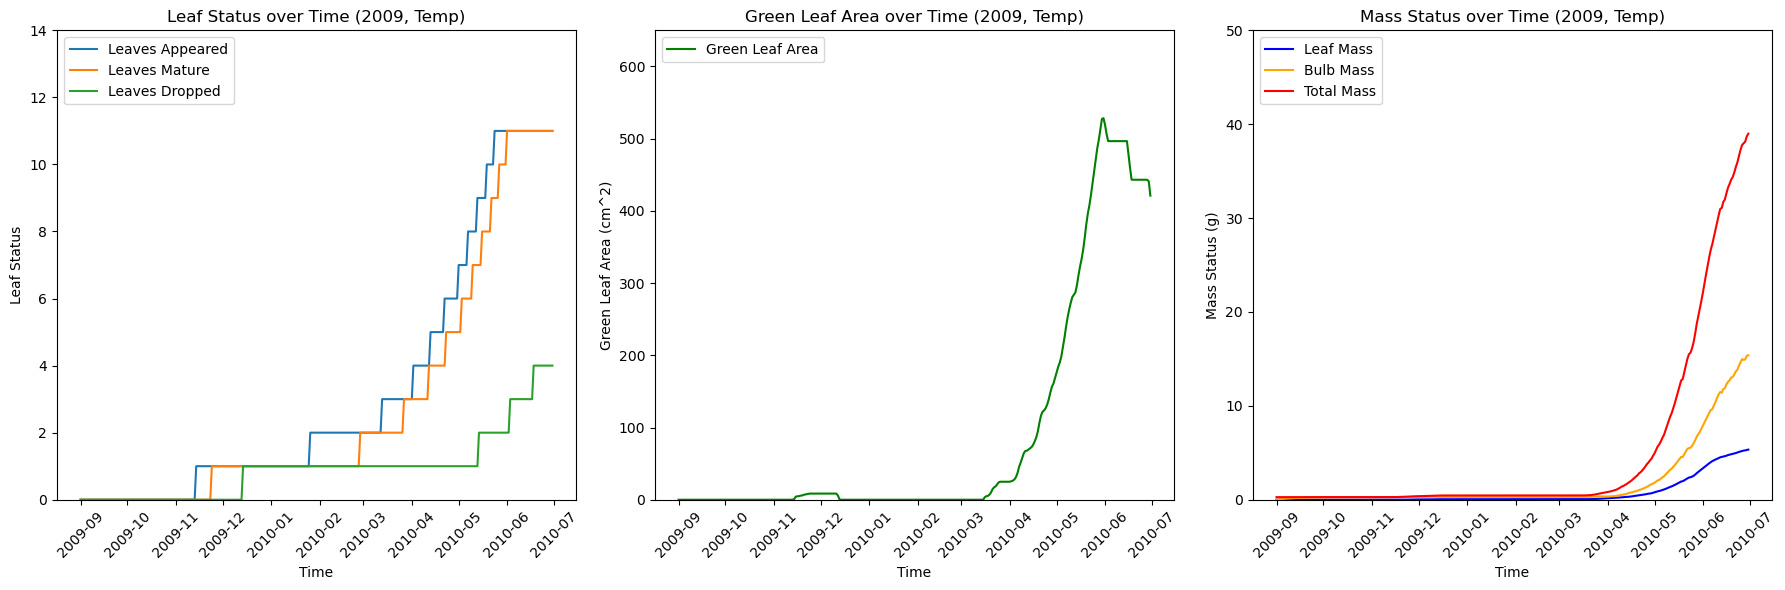

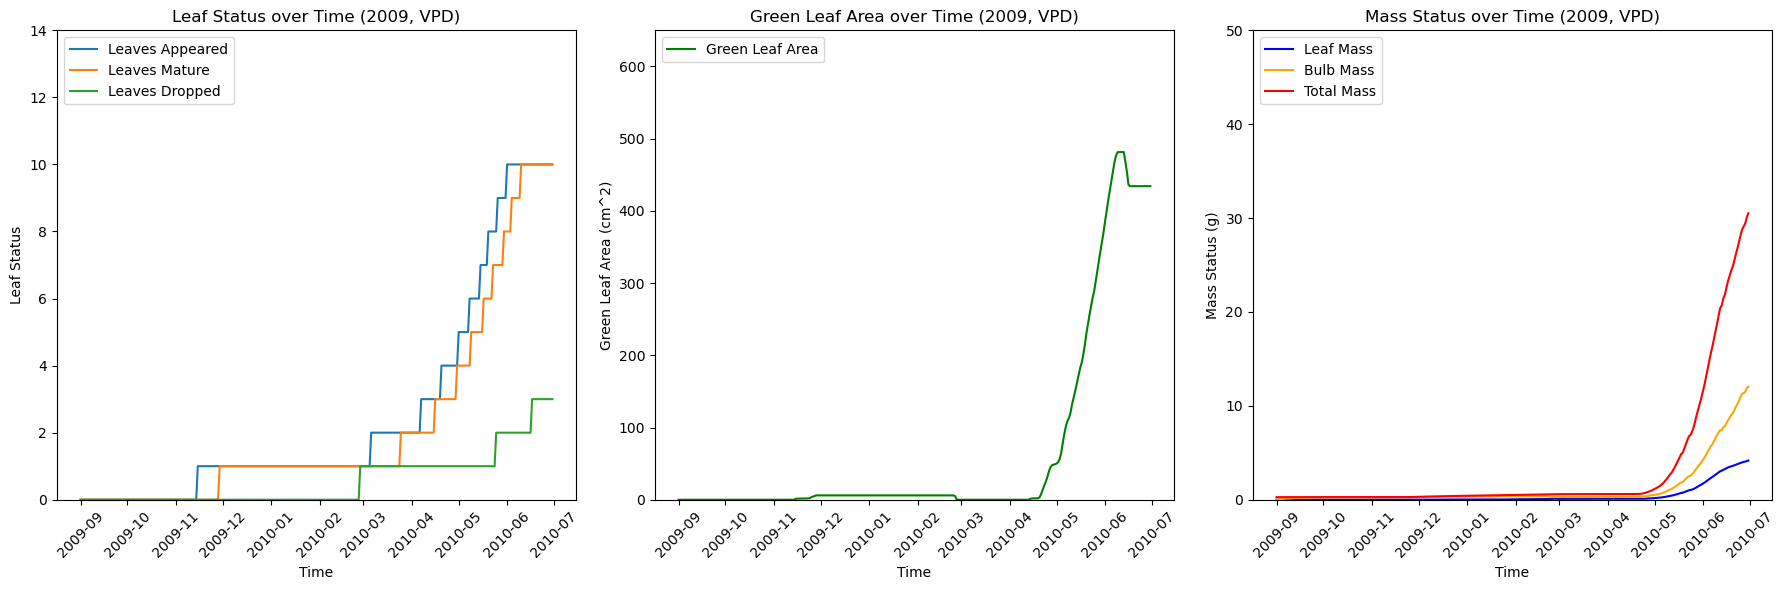

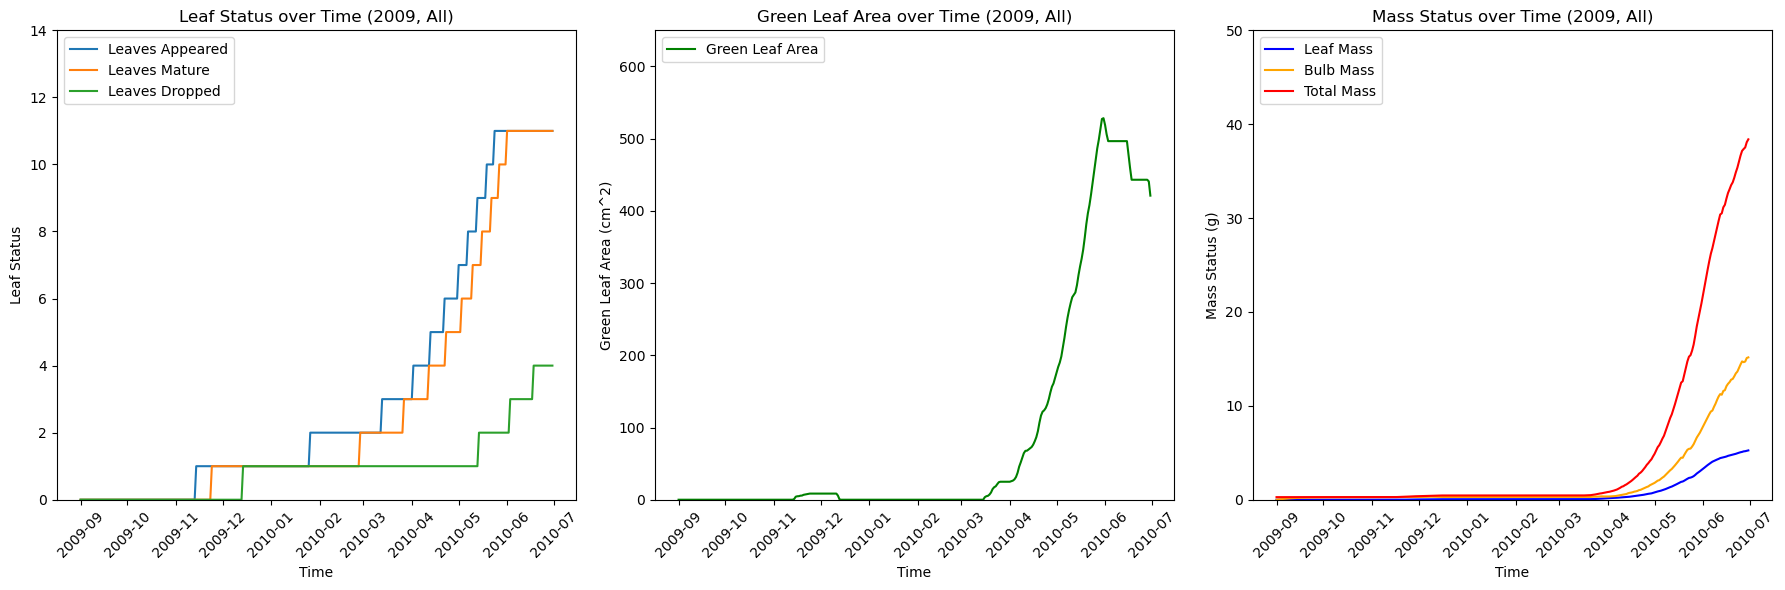

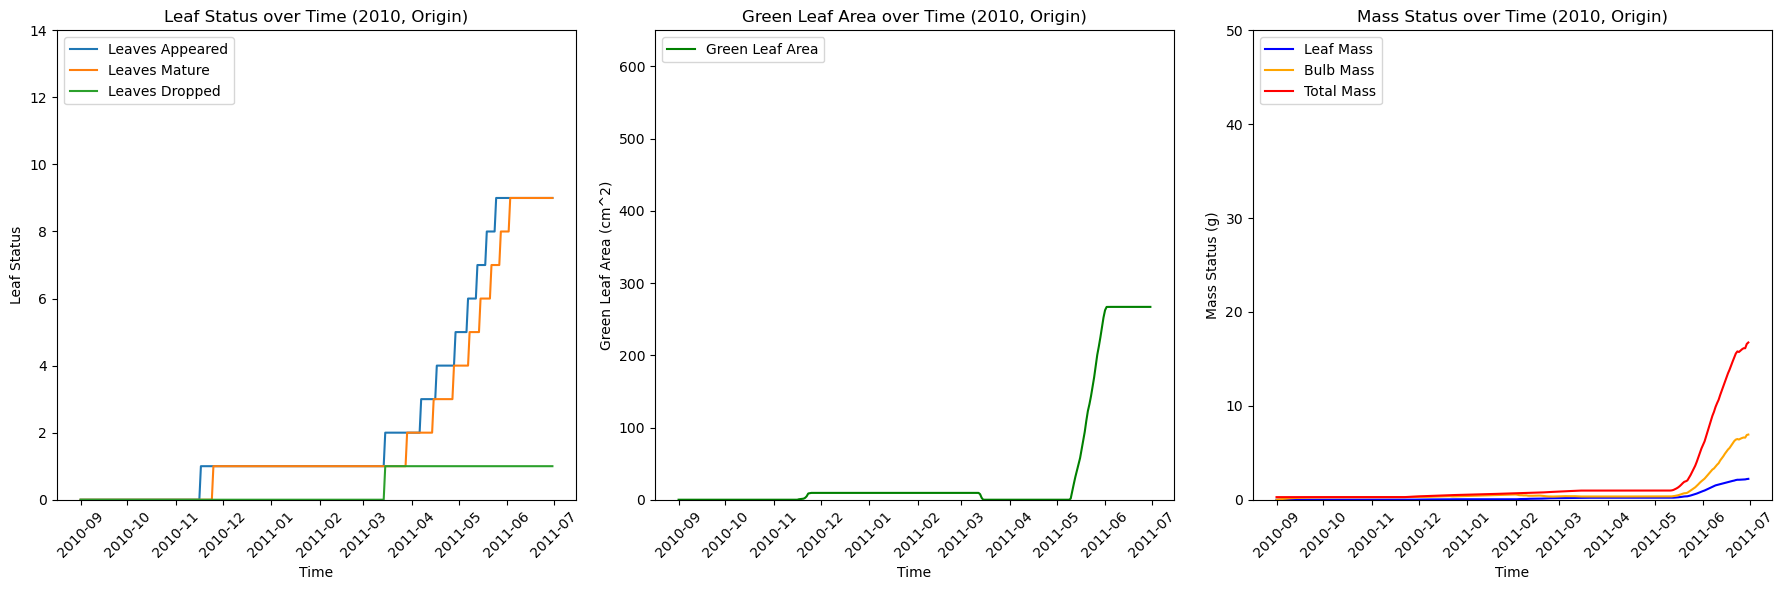

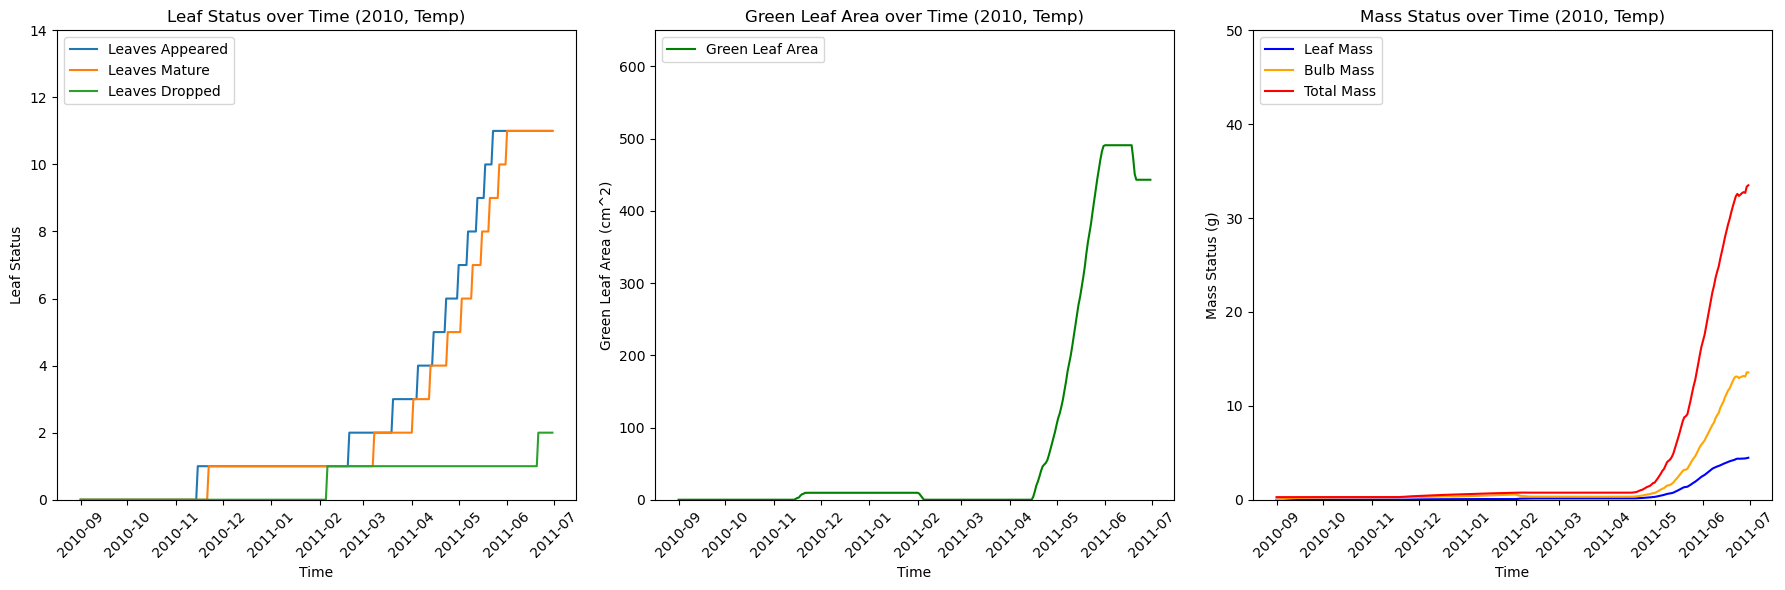

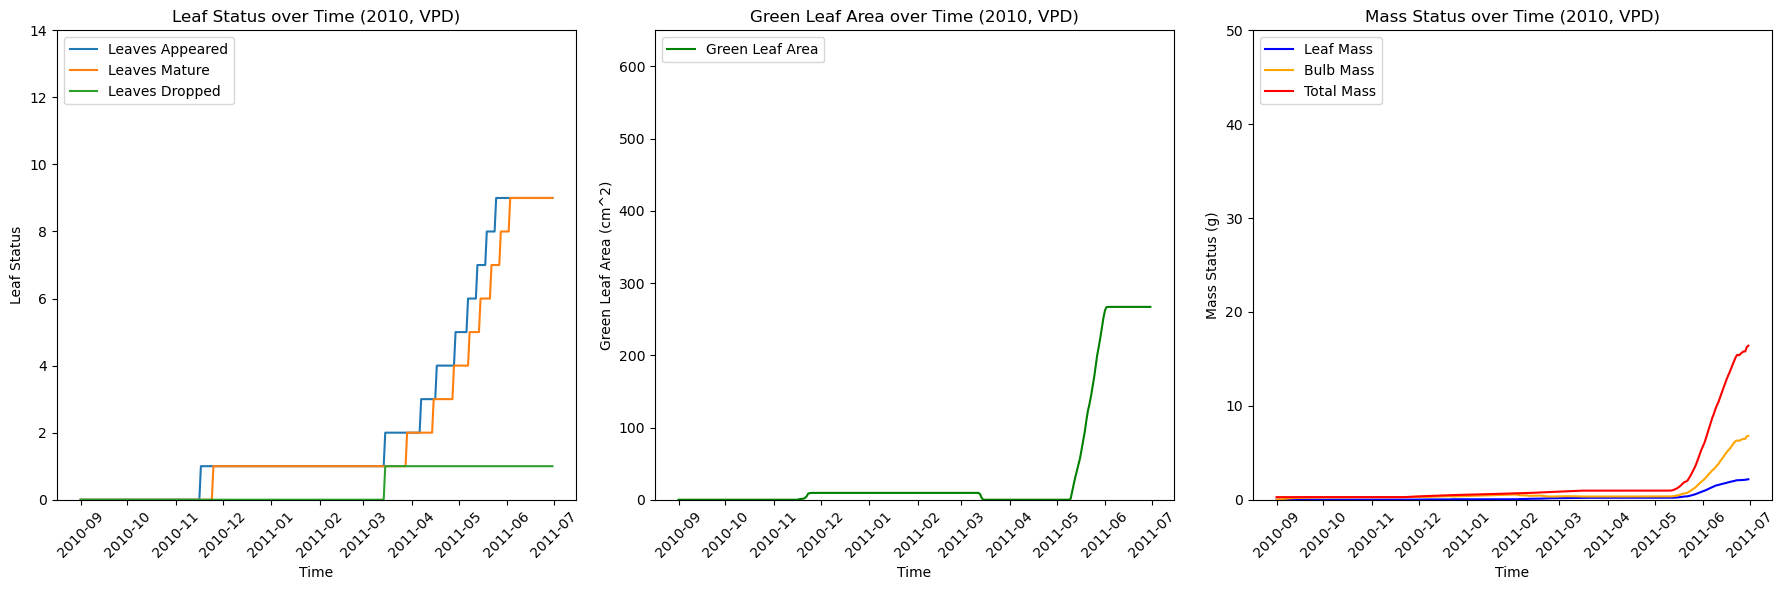

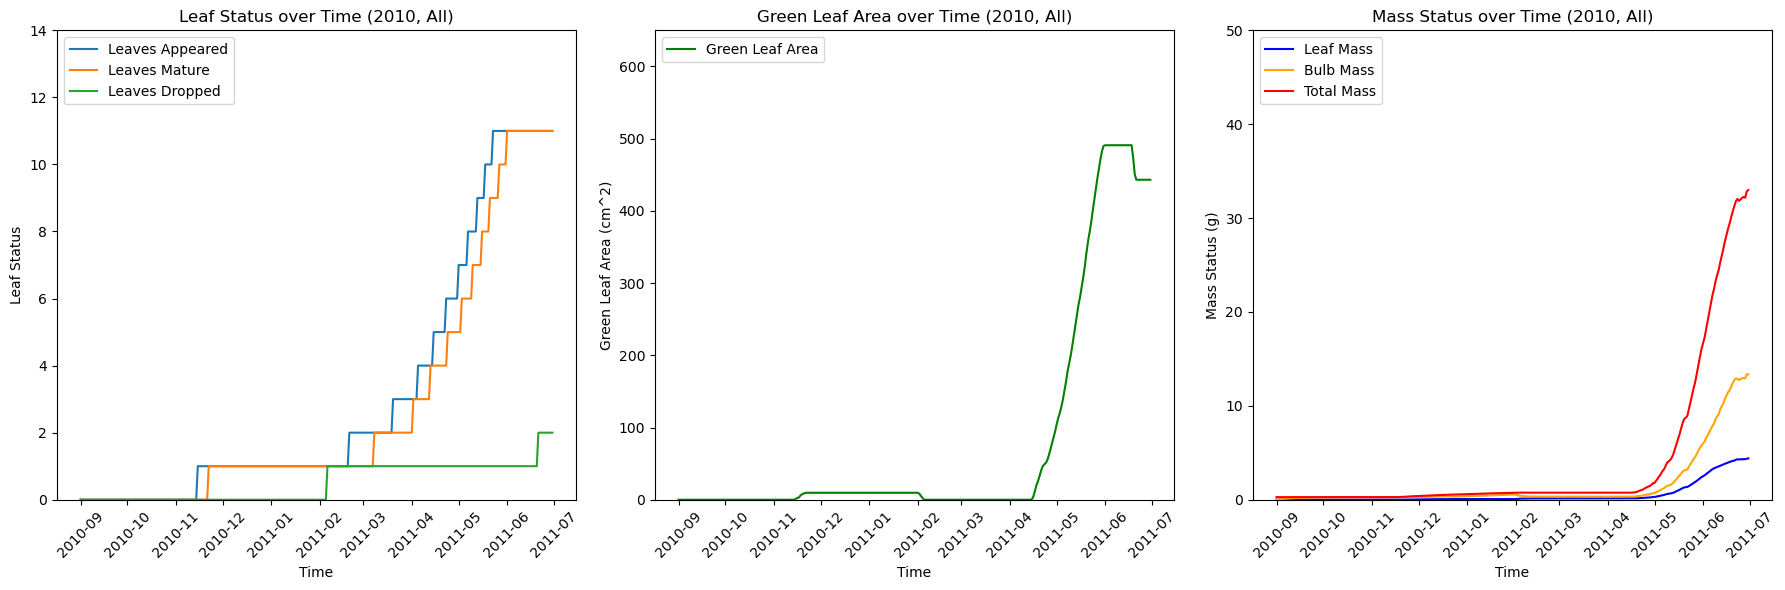

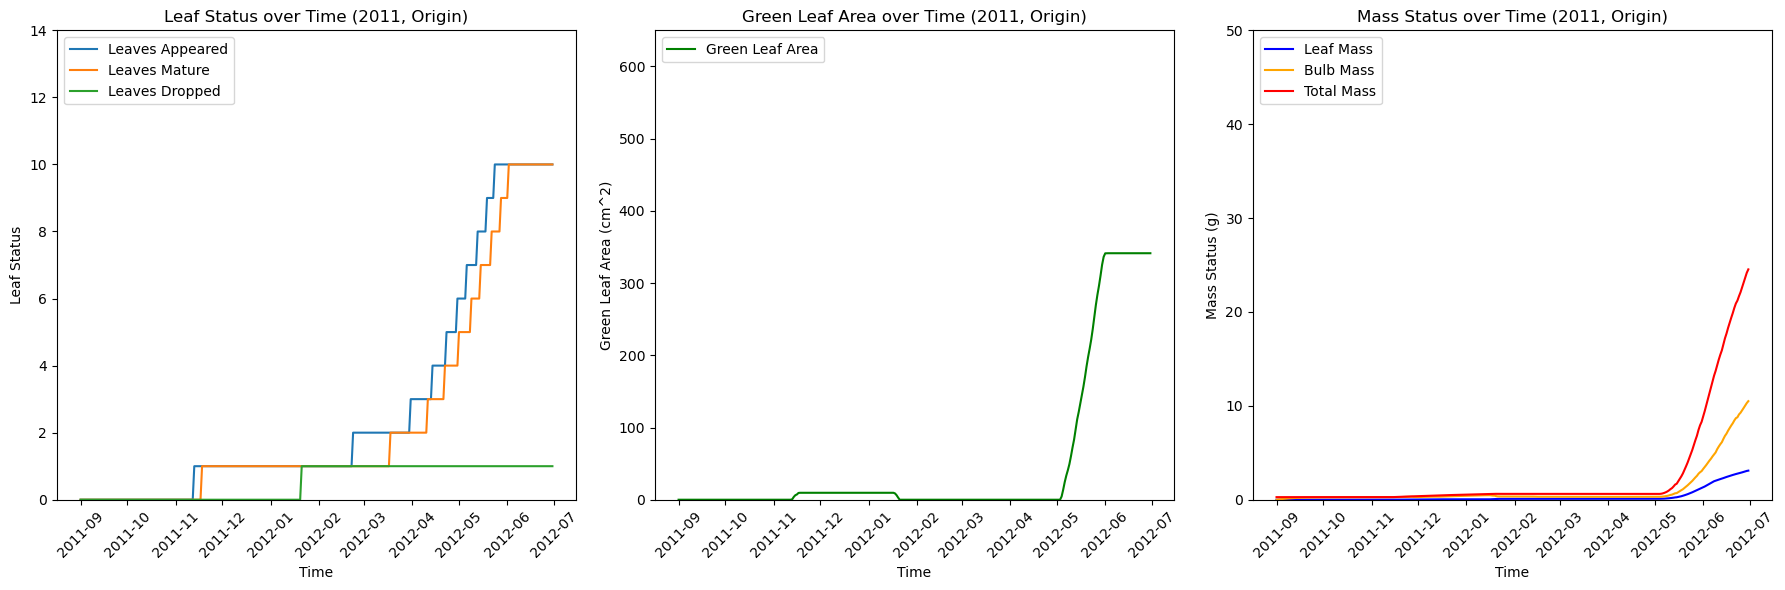

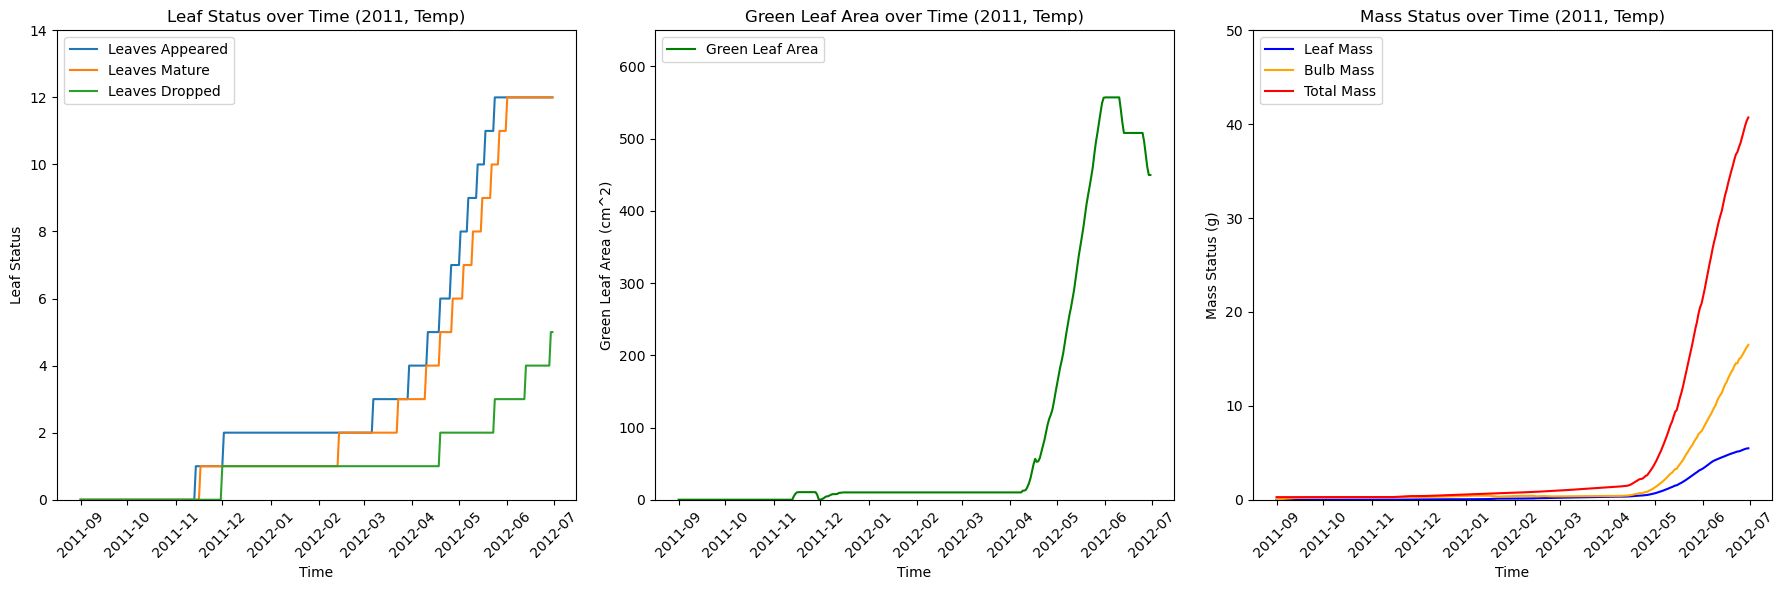

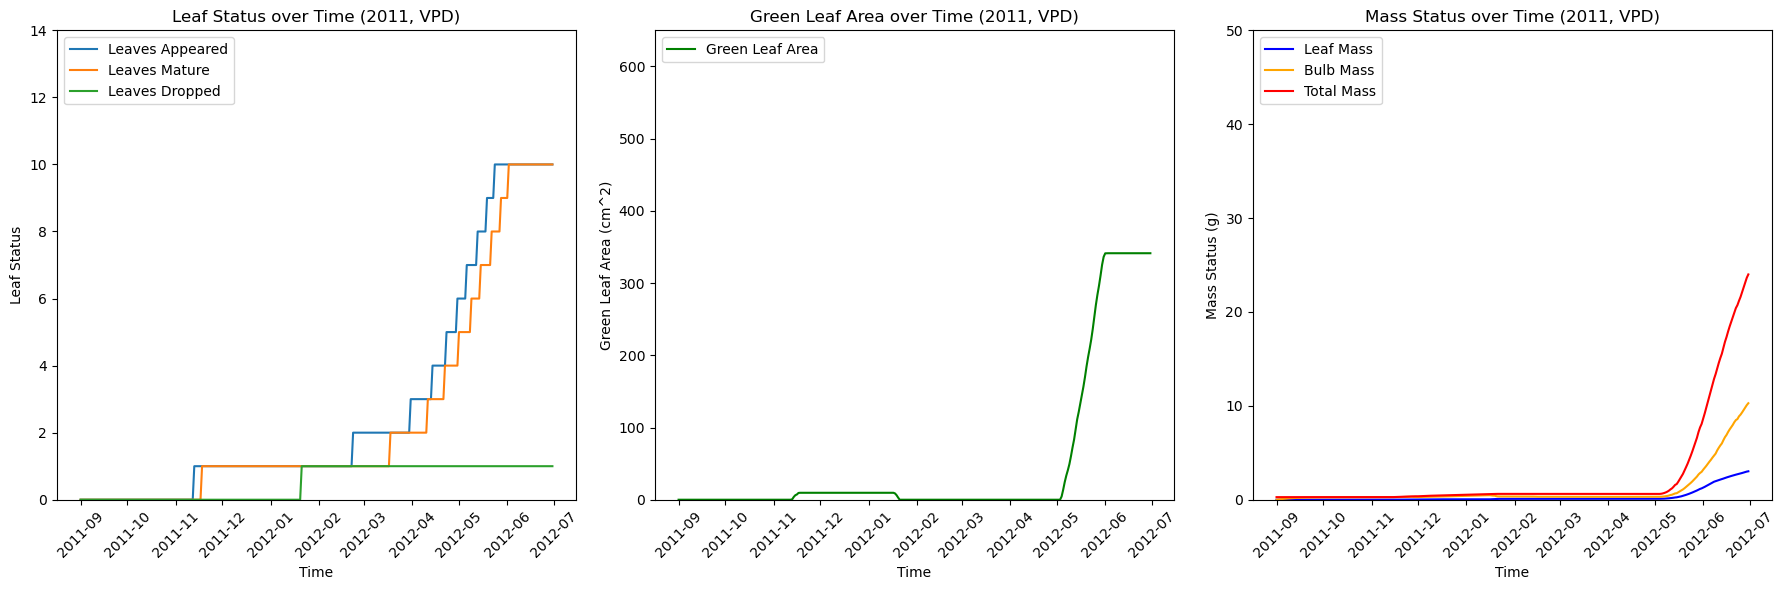

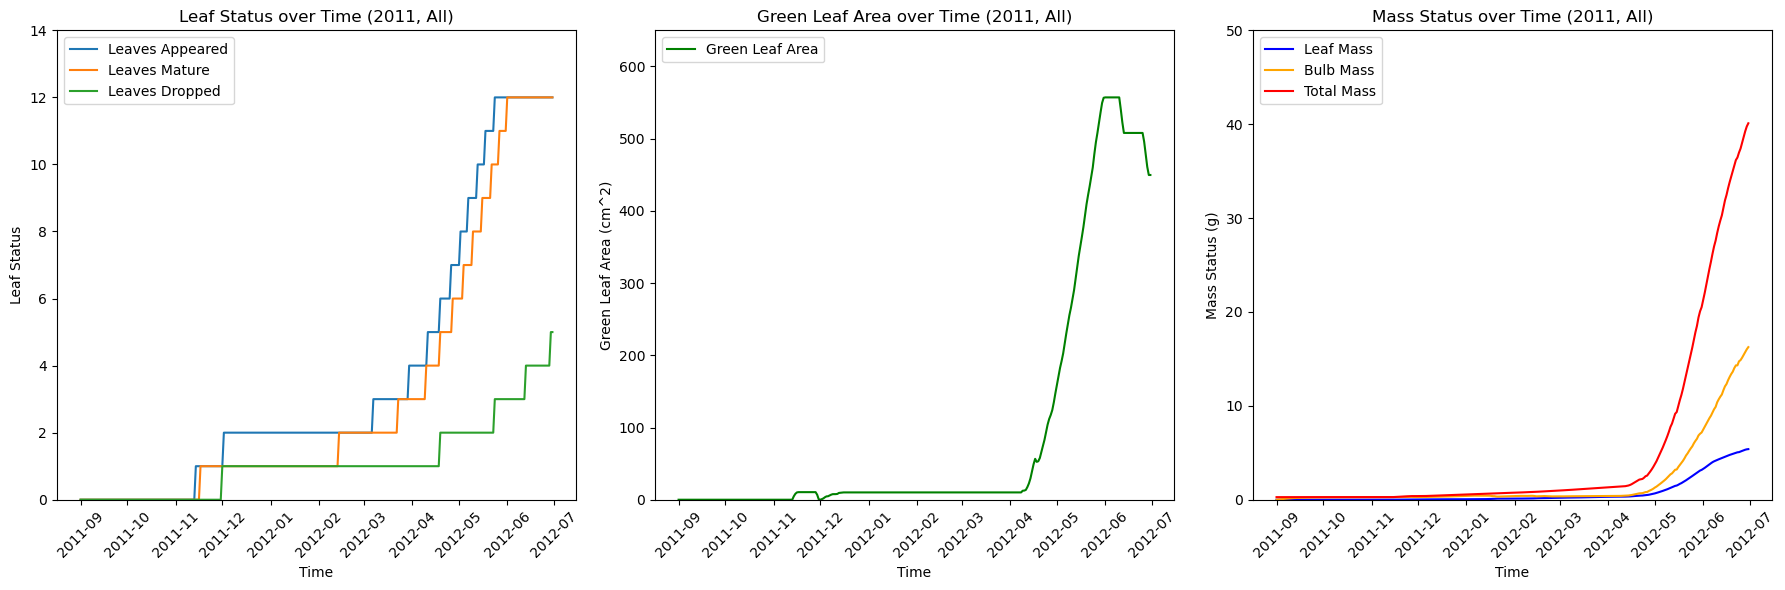

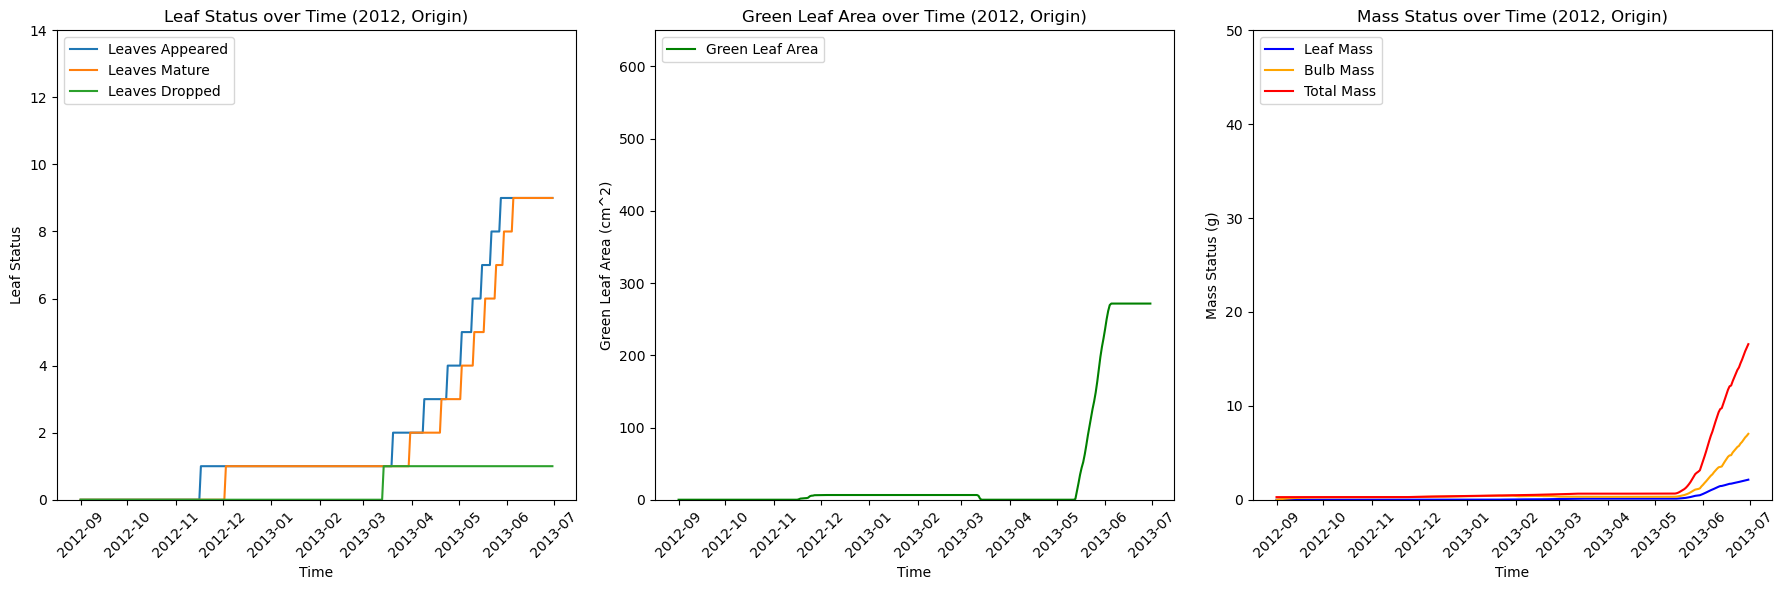

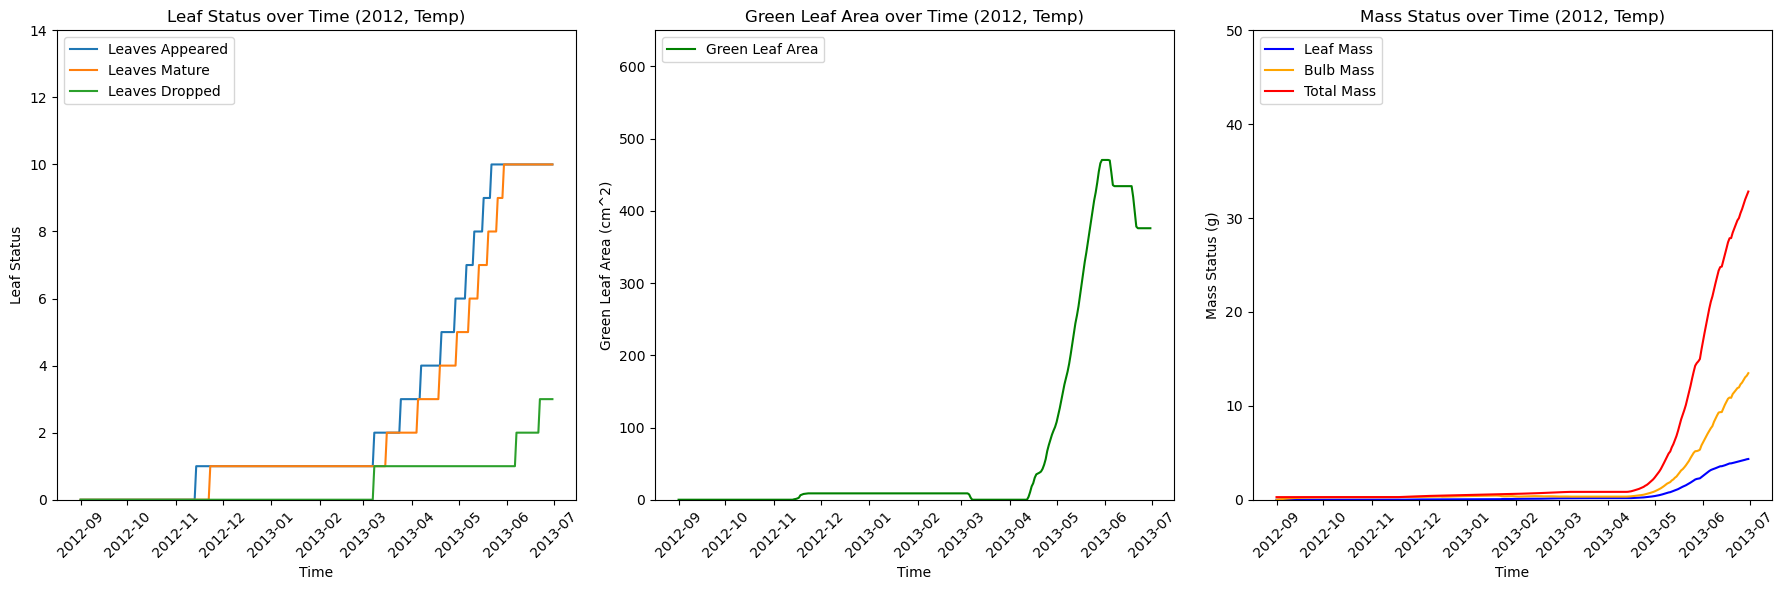

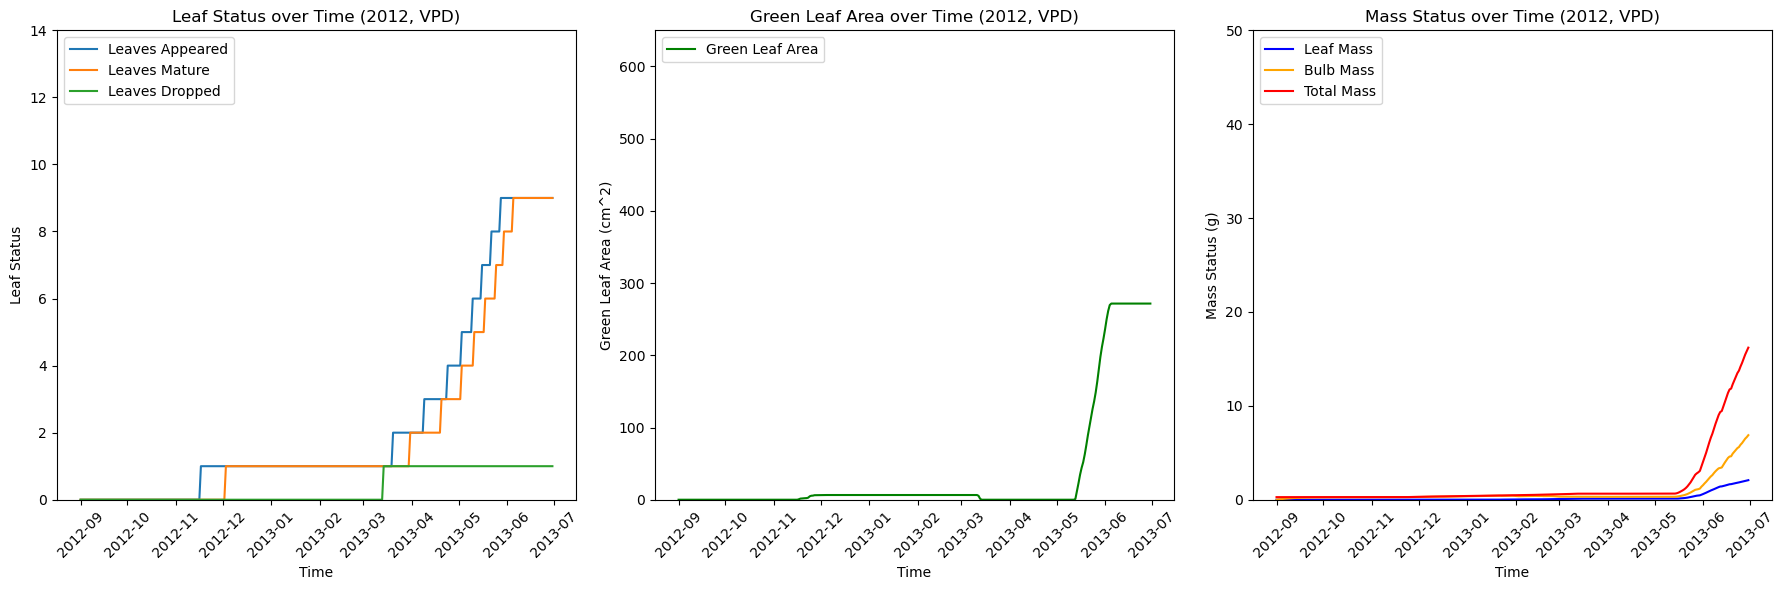

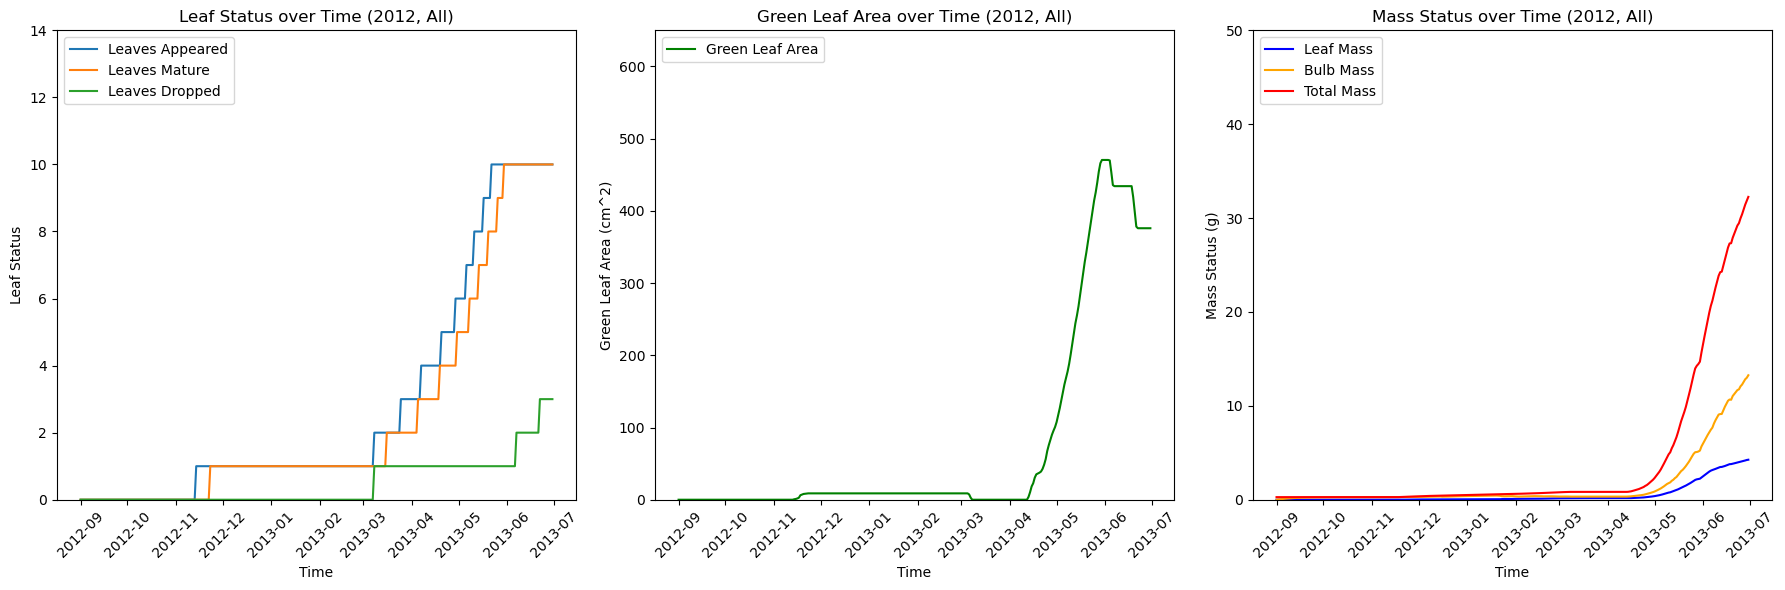

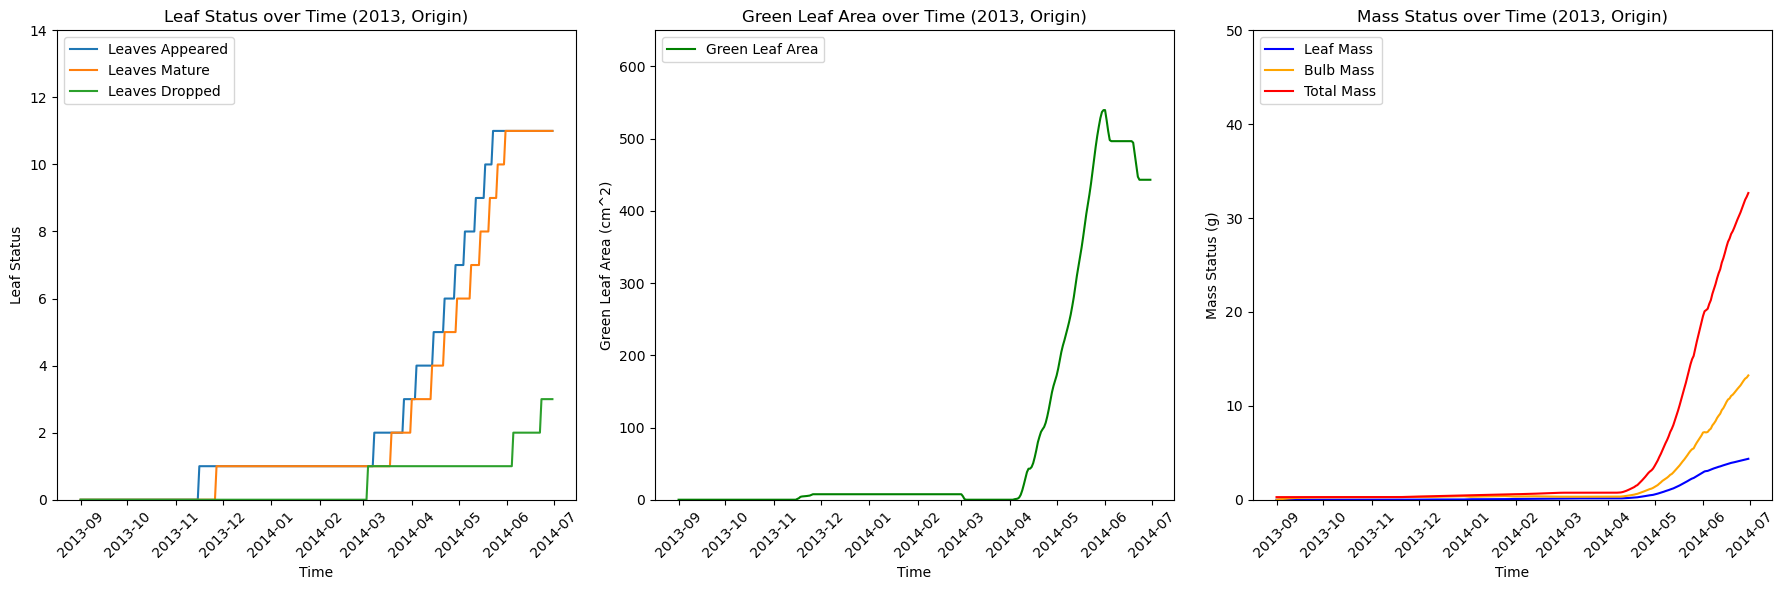

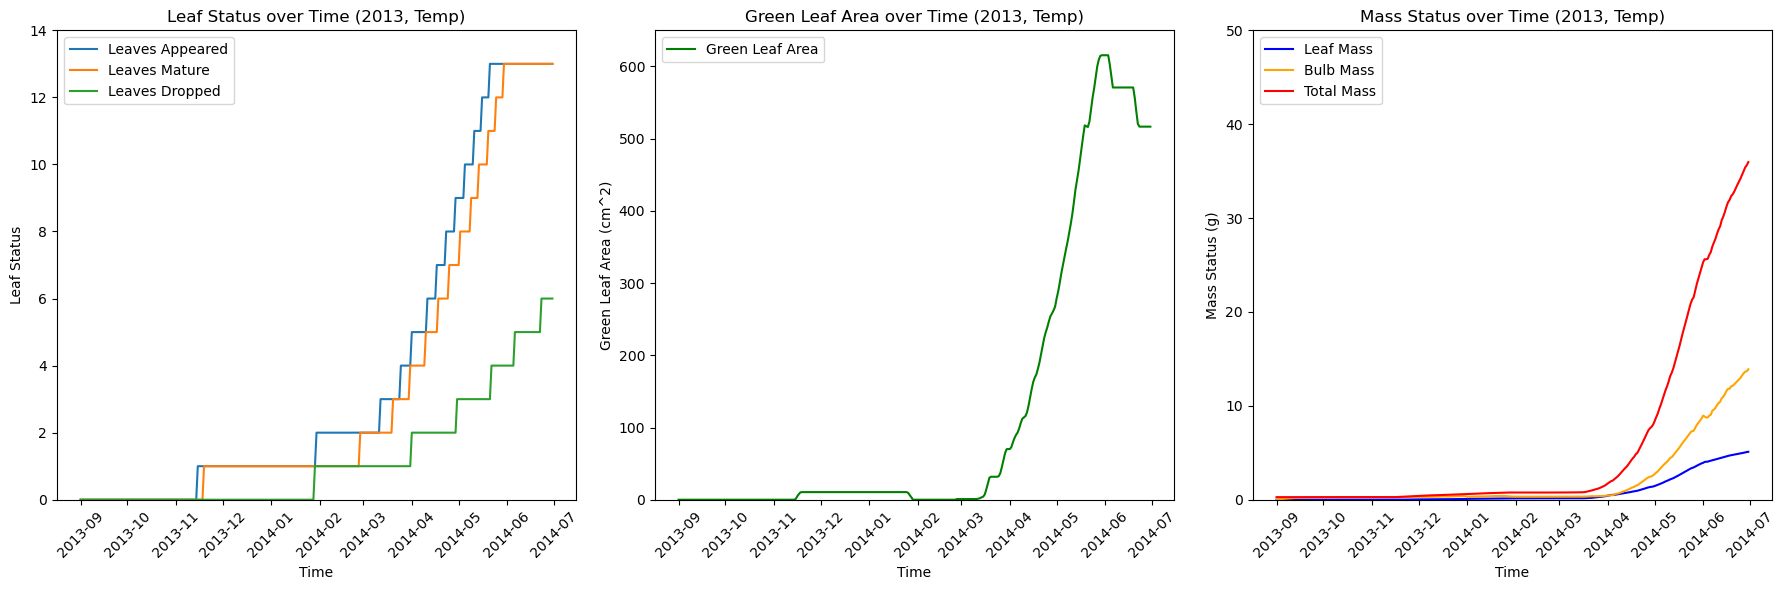

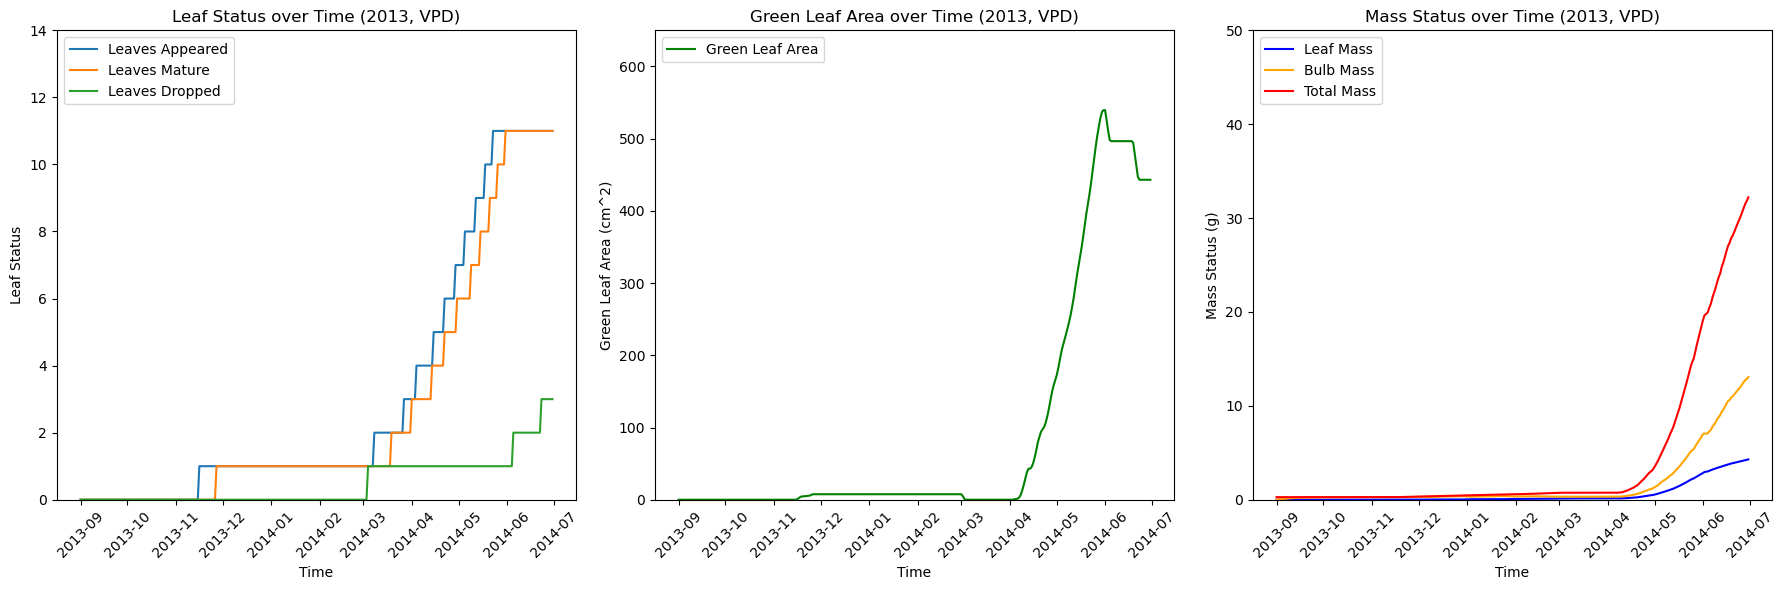

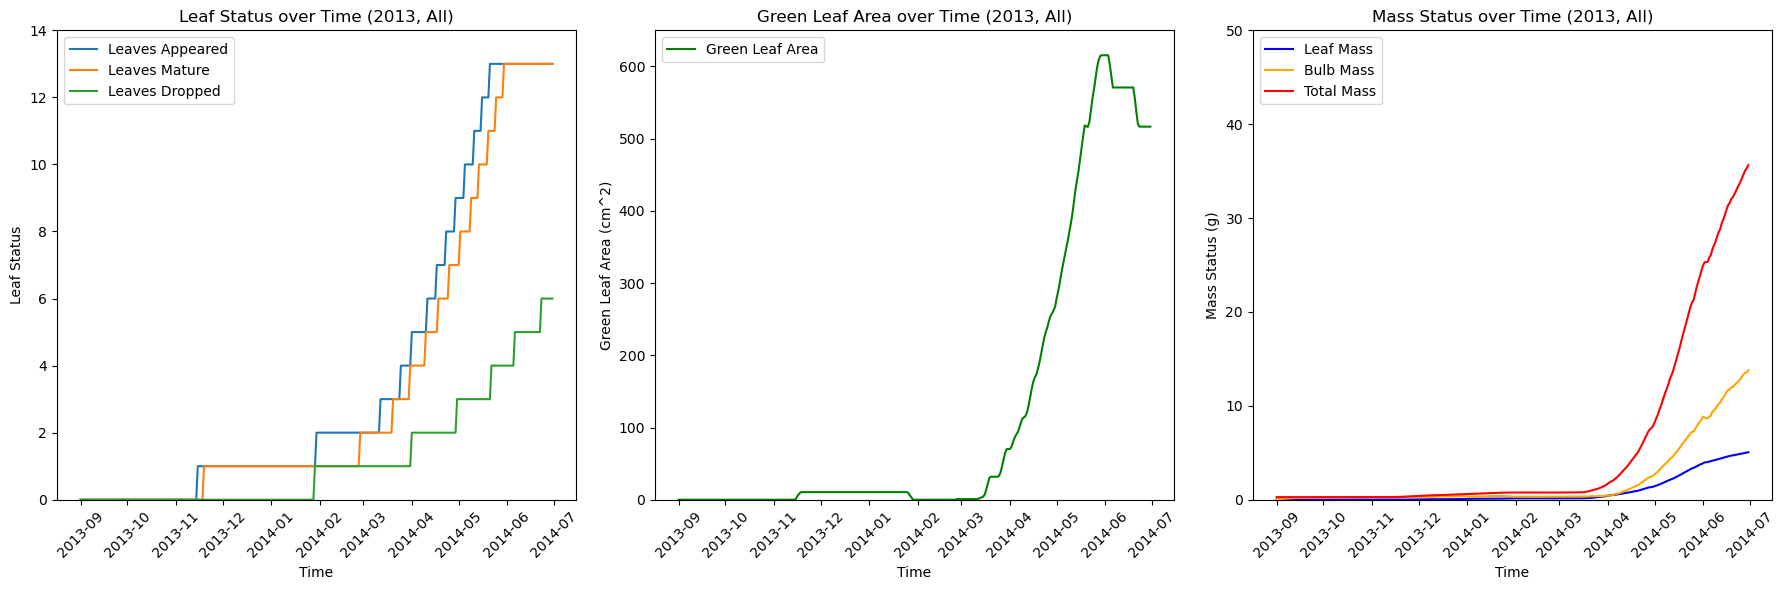

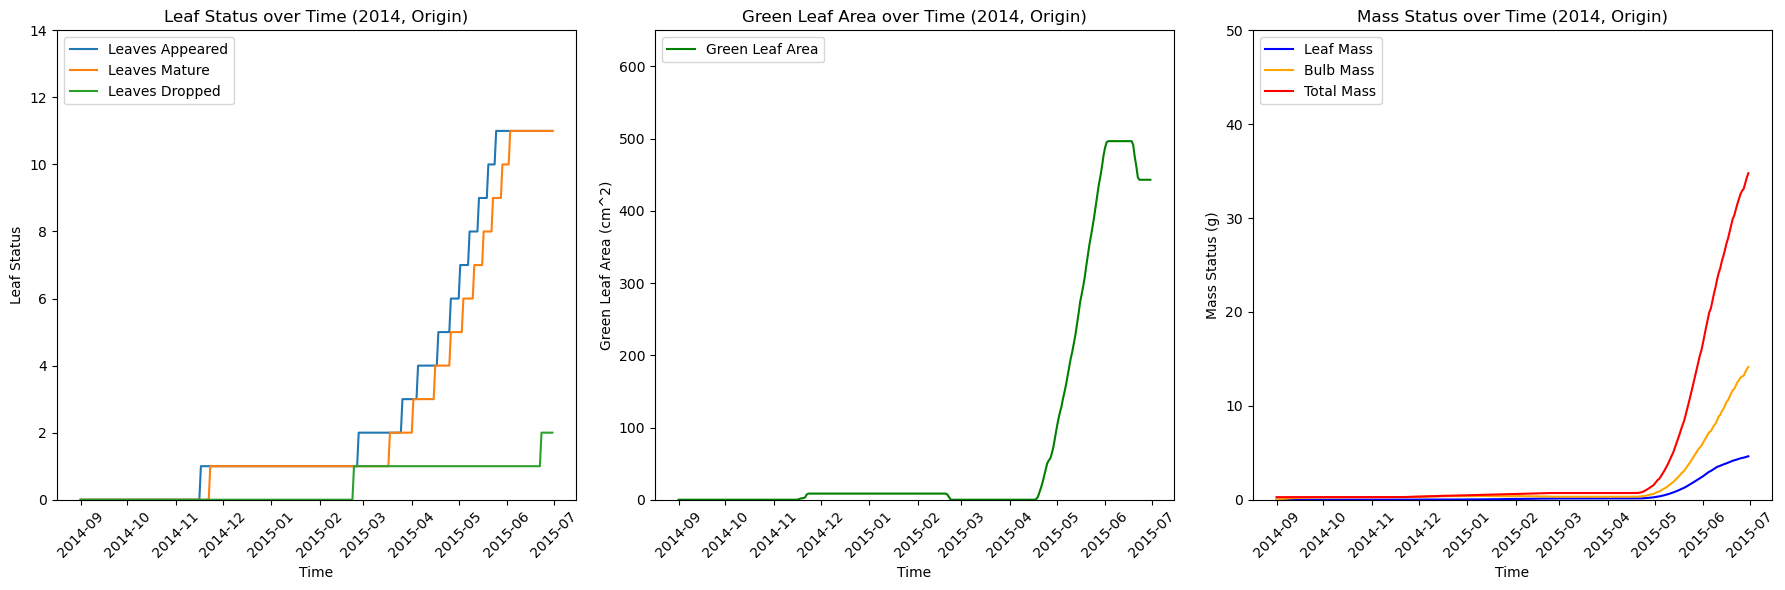

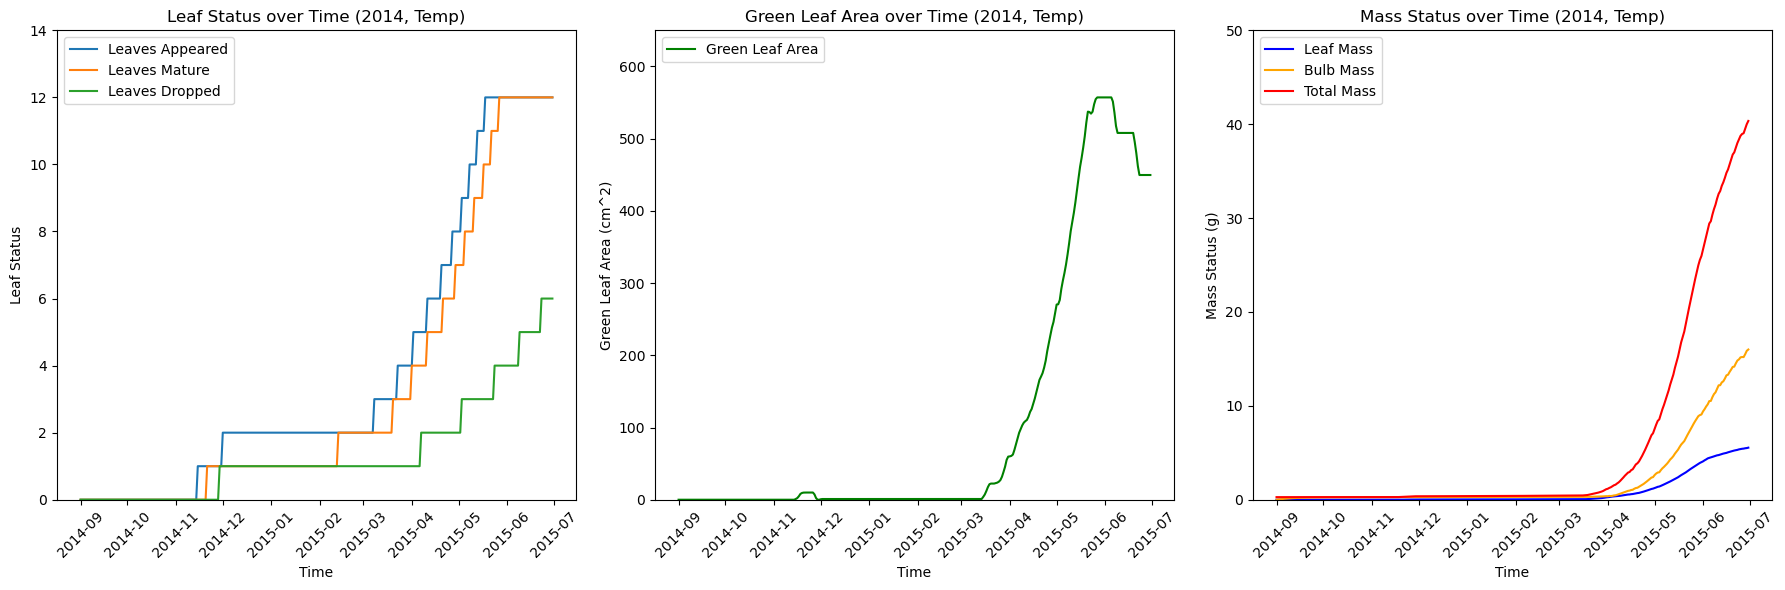

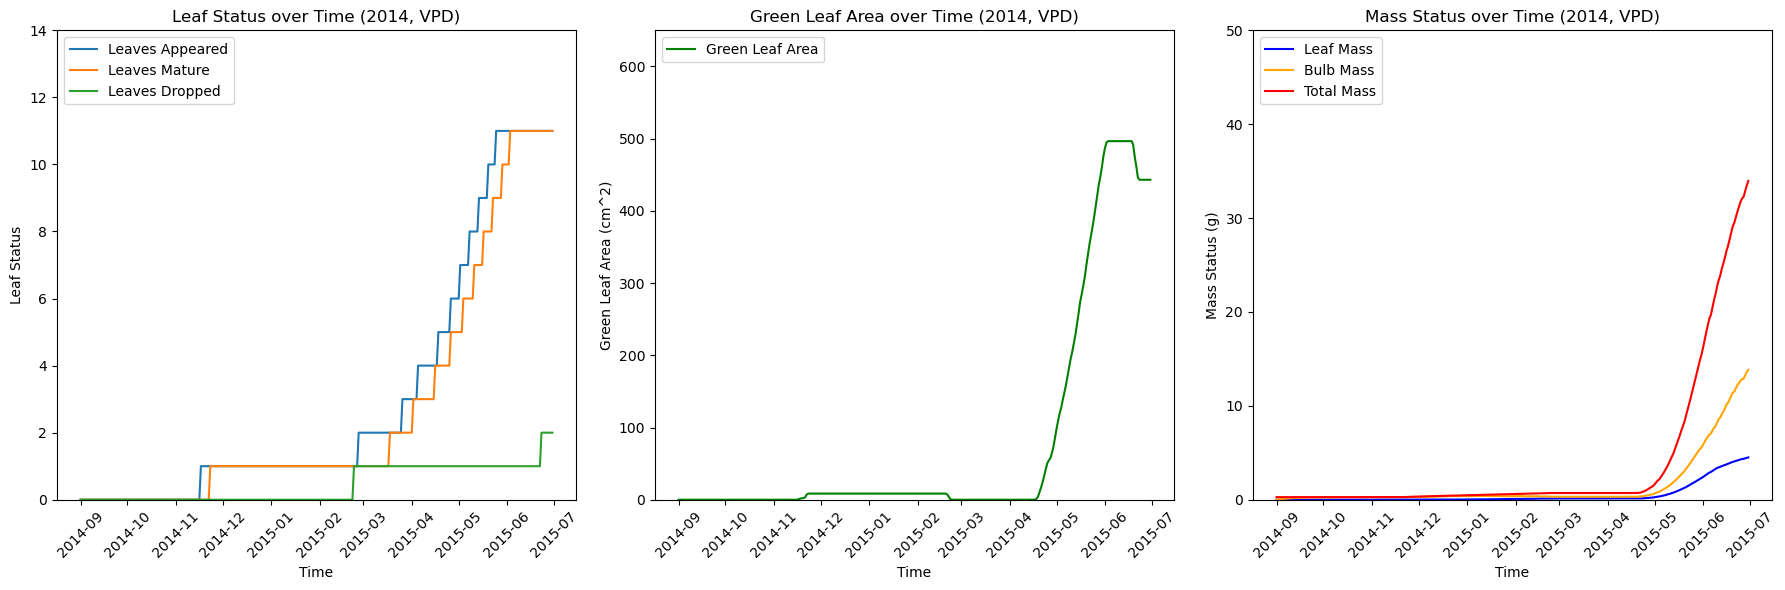

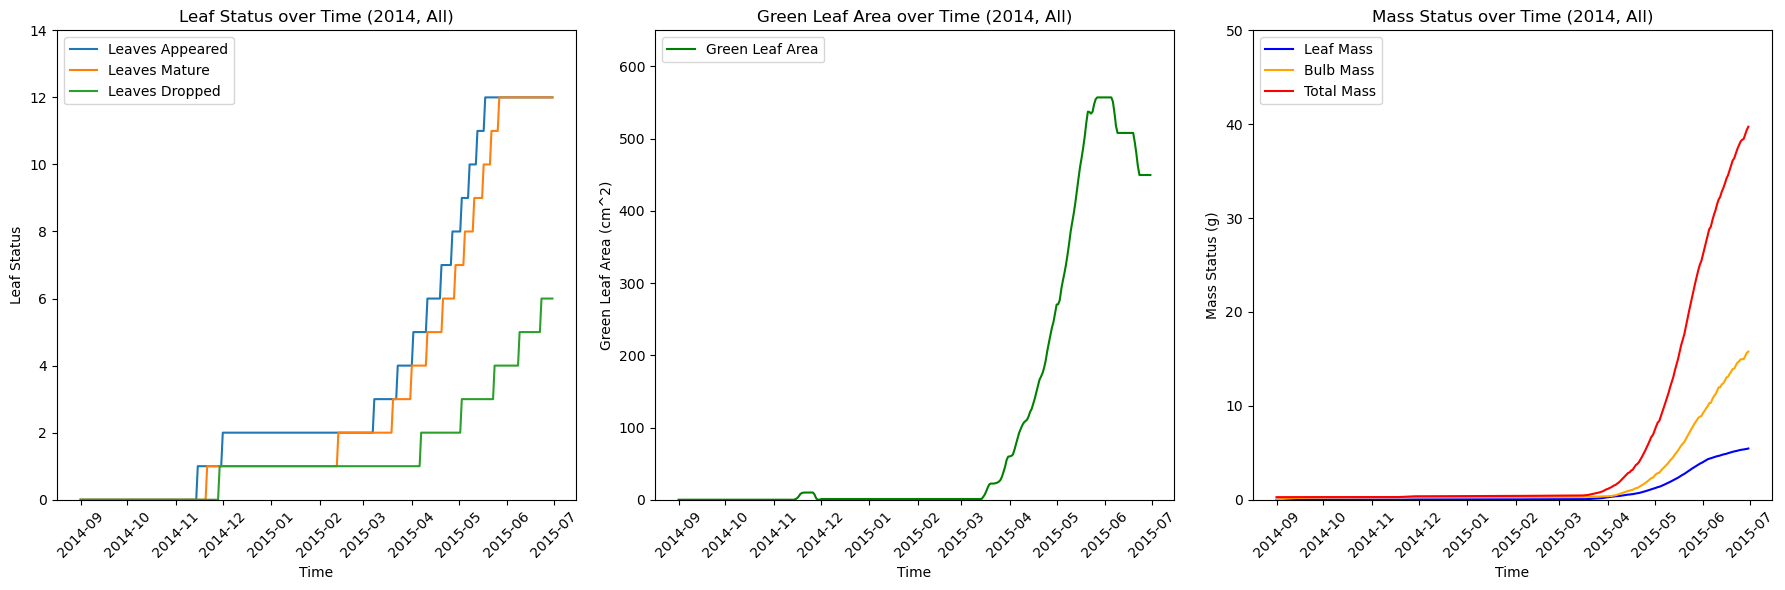

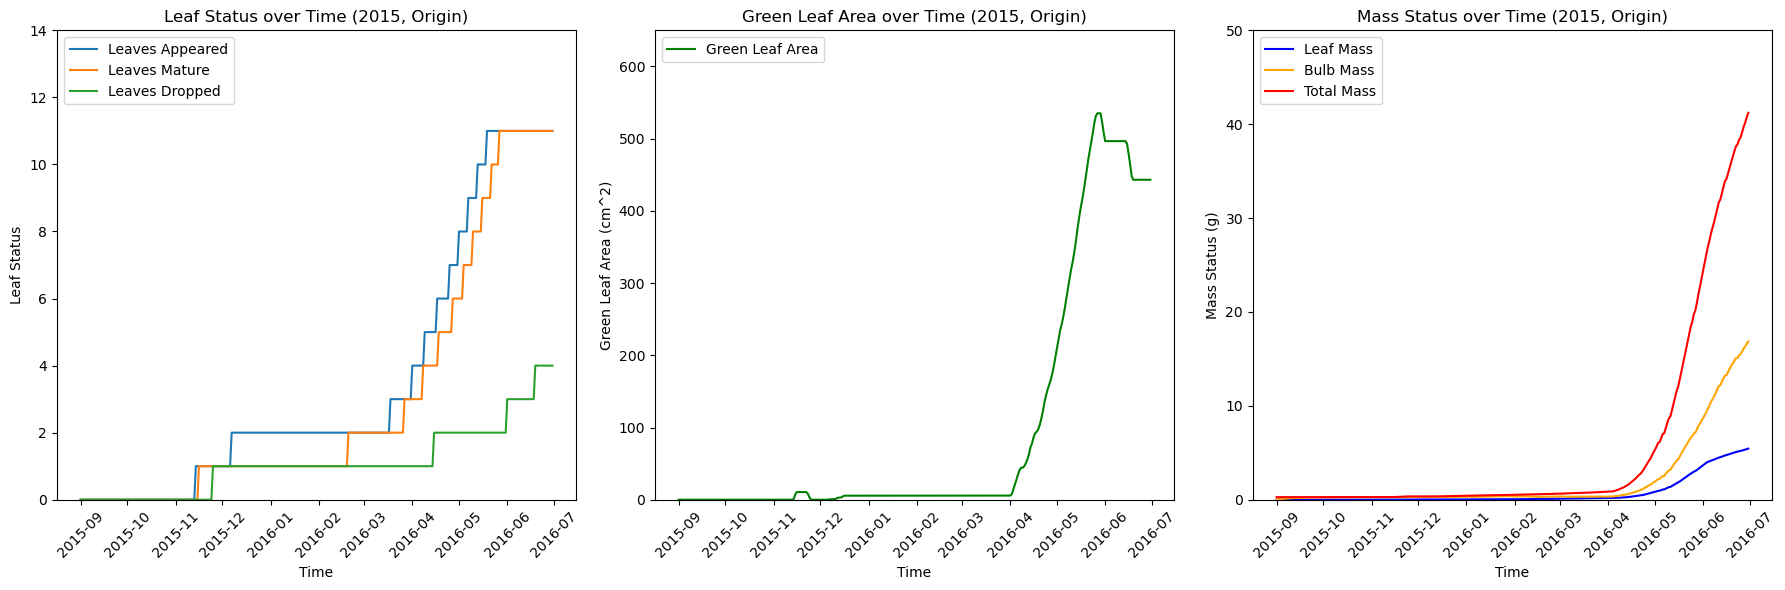

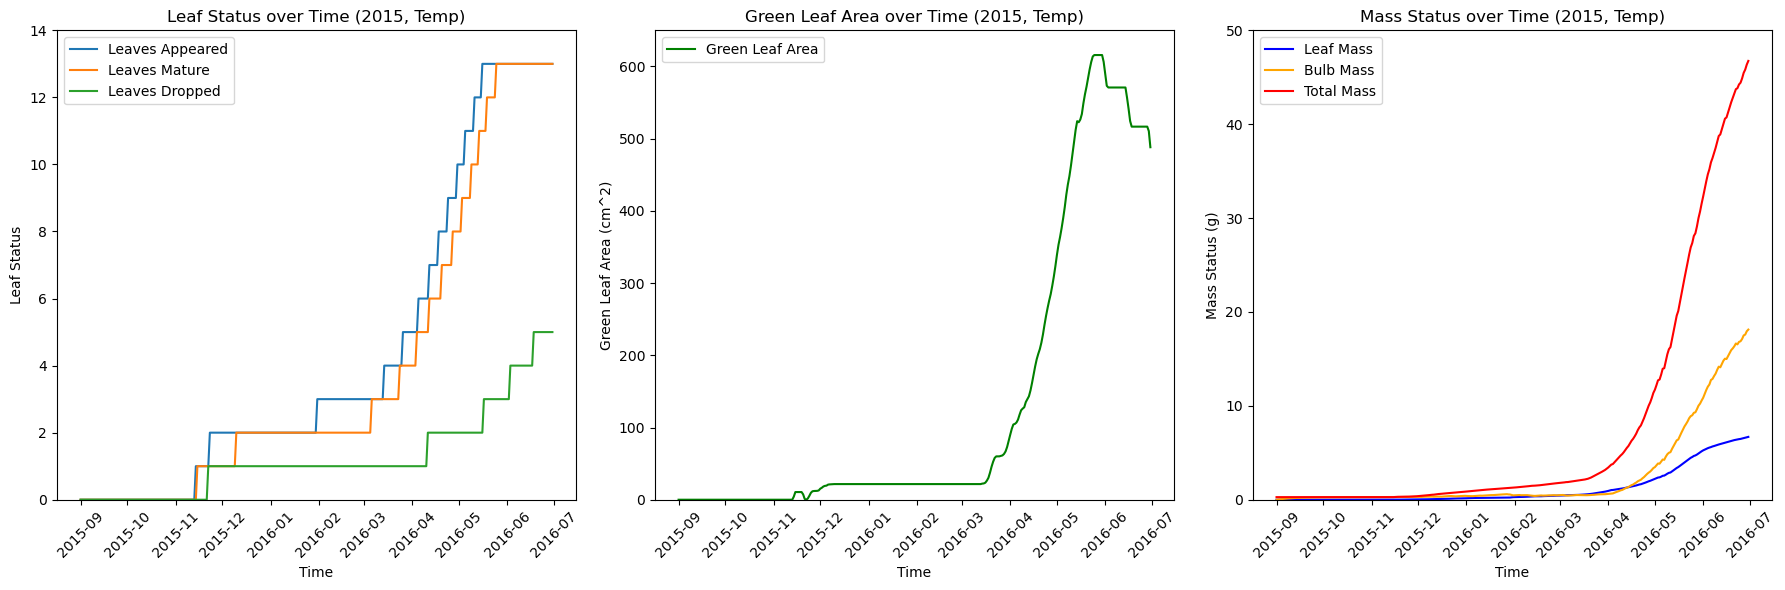

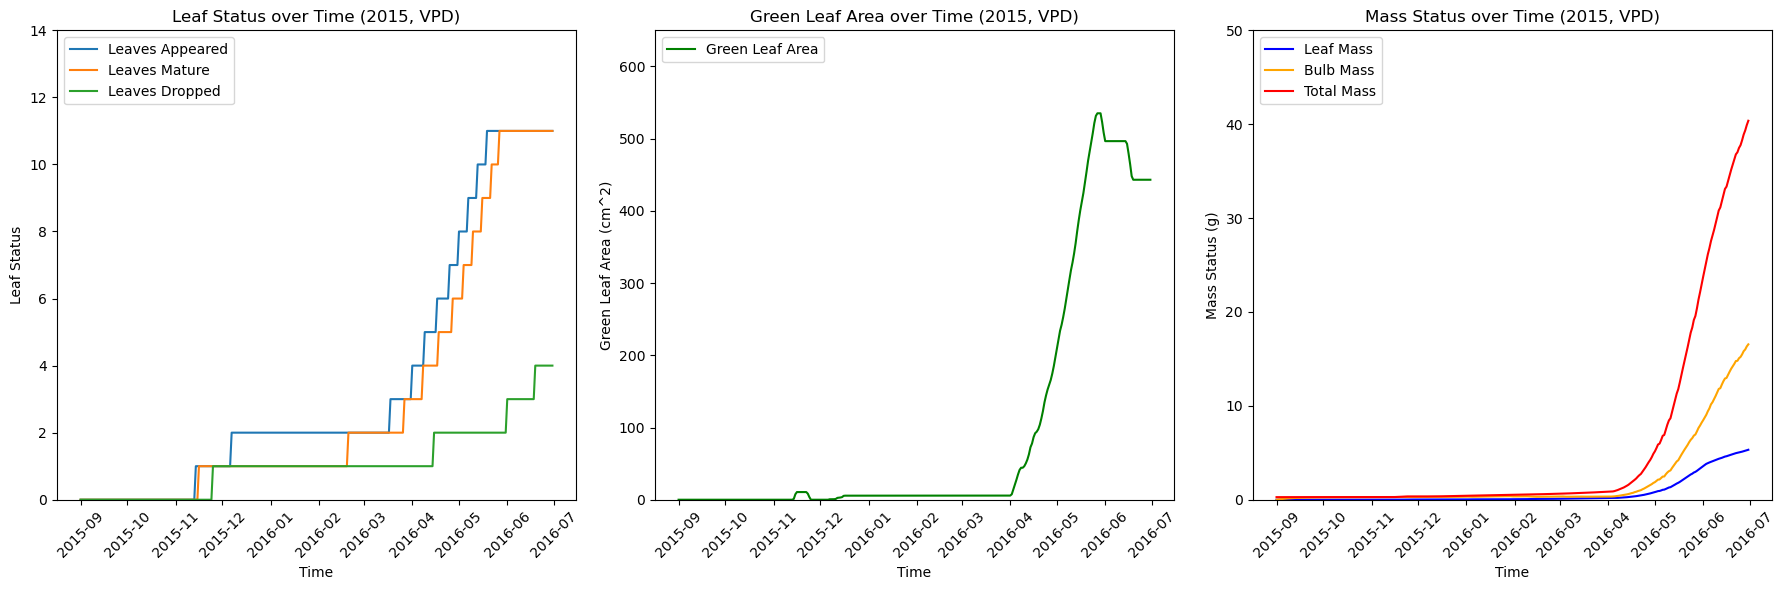

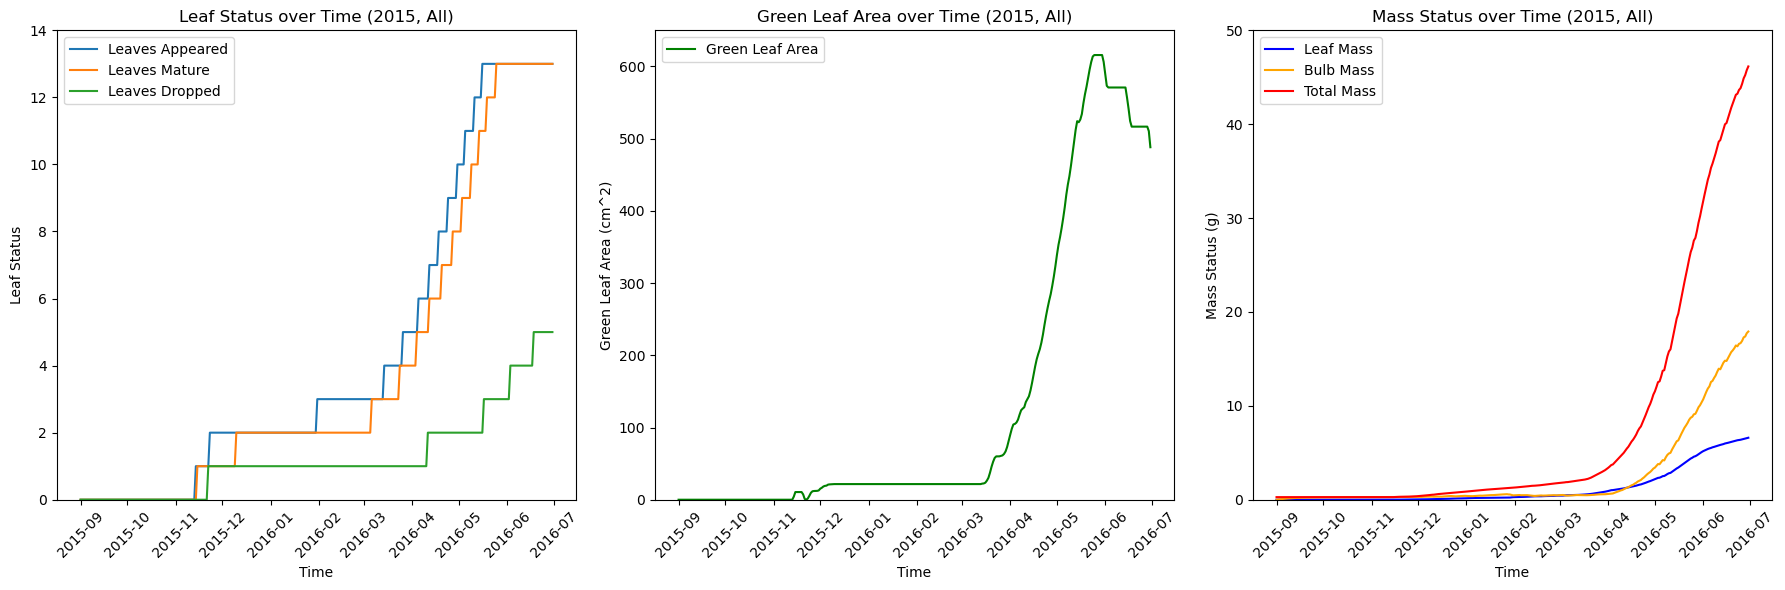

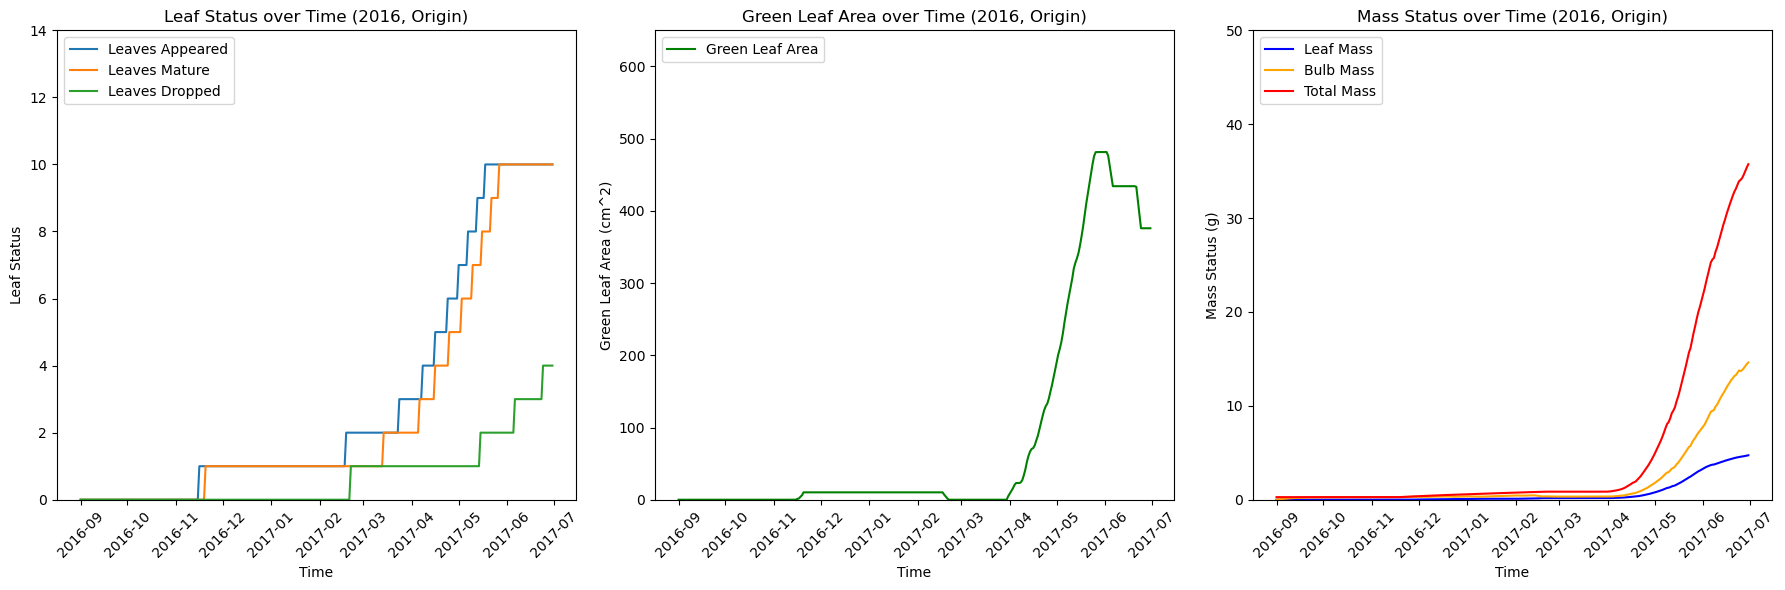

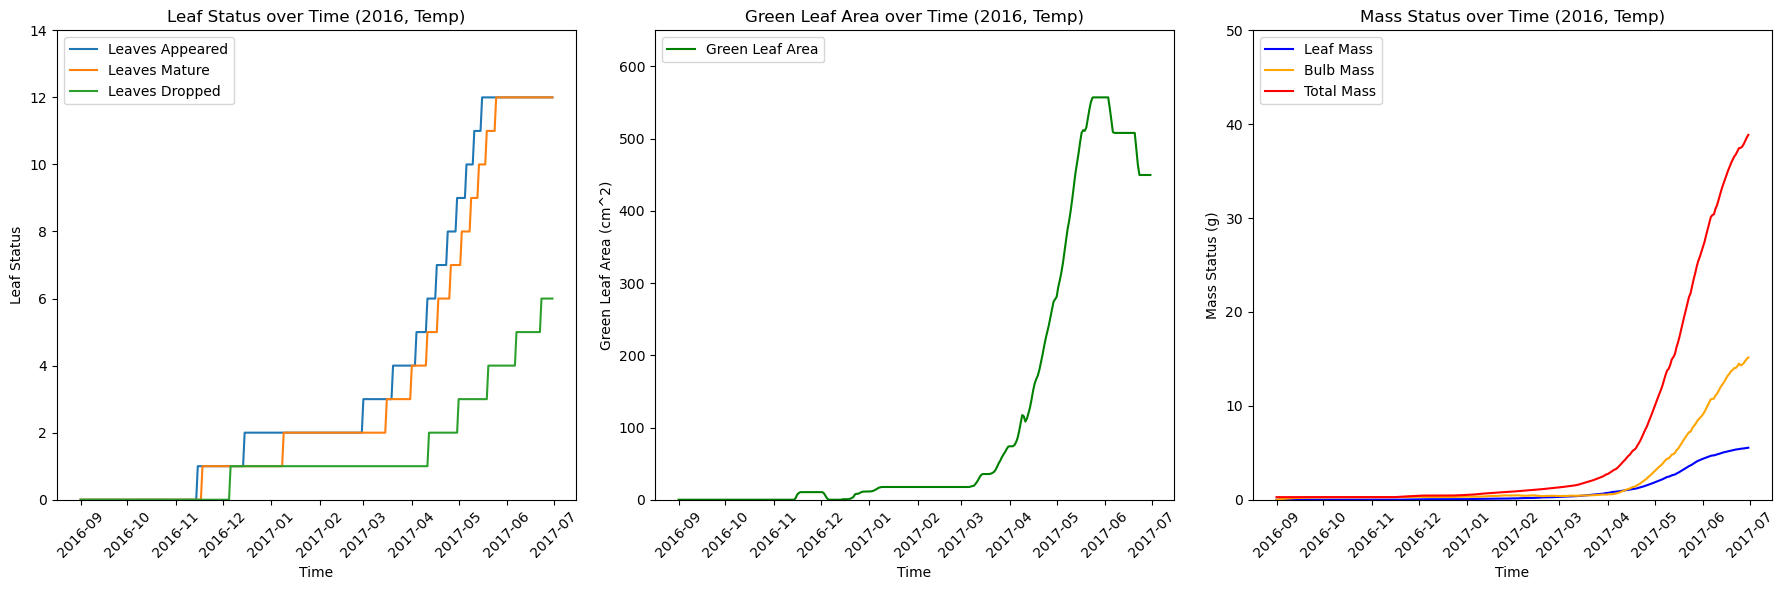

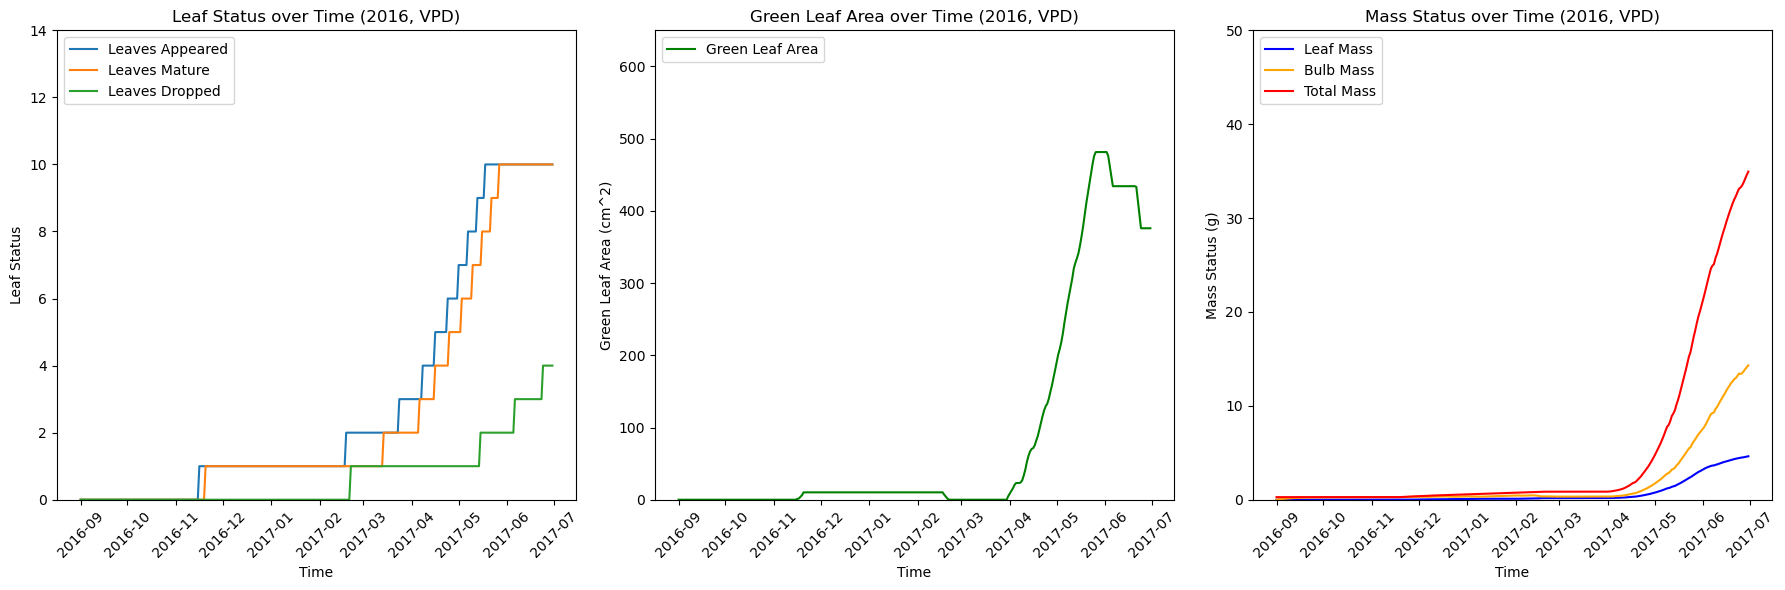

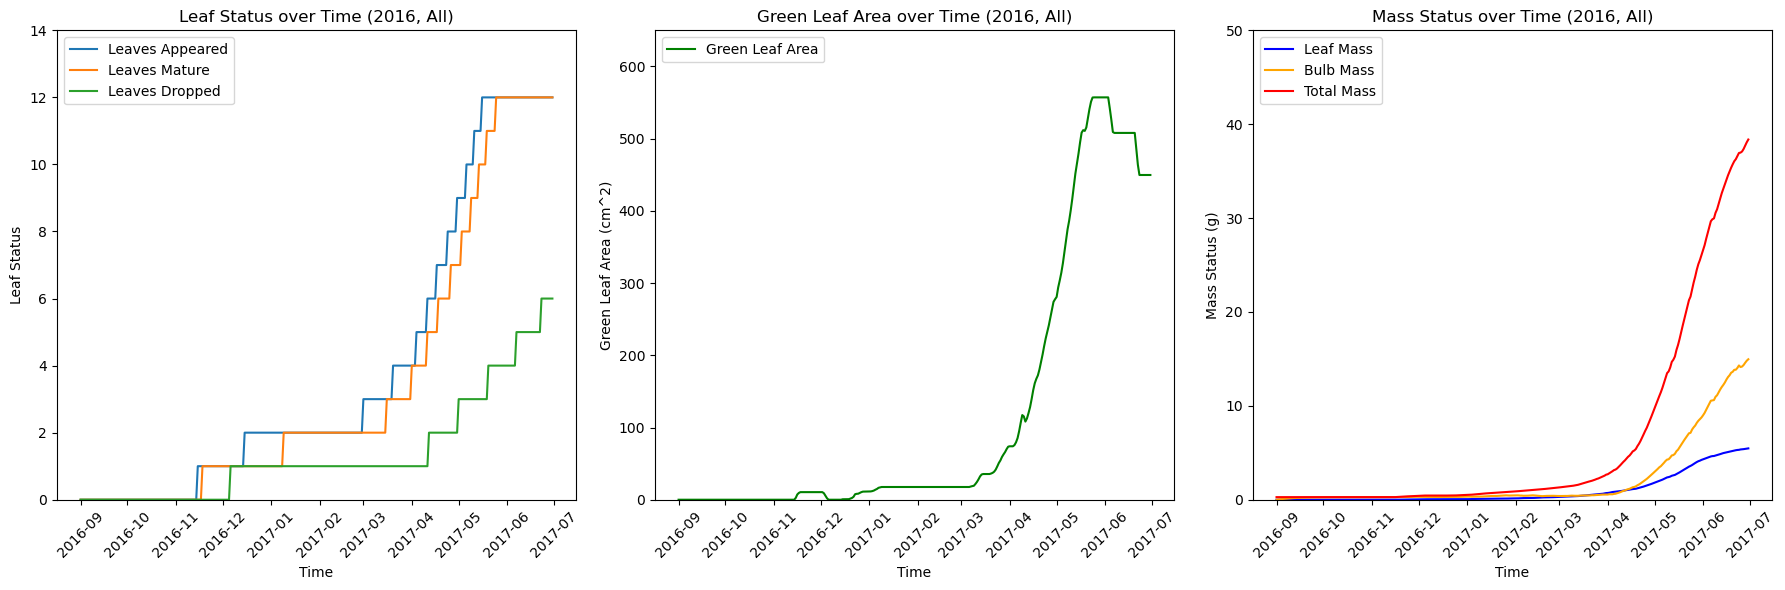

In [33]:
years = 2007:2016
output_file = "simulation_results.csv"
run_all_simulations_and_save(years, output_file)

In [49]:
function mad(data)
    median_value = median(data)
    return median(abs.(data .- median_value))
end

mad (generic function with 1 method)

In [50]:
function plot_leaf_data_percent_change_median_with_mad(results_file::String)
    df = CSV.read(results_file, DataFrame)
    
    versions = ["Temp", "VPD", "All"]
    colors = ["#8F70C2", "#4A4453", "#B0A8BA"]
    
    origin_data = filter(row -> row.version == "Origin", df)
    
    leaf_area_percent_changes = []
    leaf_count_percent_changes = []
    biomass_percent_changes = []
    
    leaf_area_mads = []
    leaf_count_mads = []
    biomass_mads = []
    
    for version in versions
        version_data = filter(row -> row.version == version, df)

        # 엽면적의 퍼센트 변화량 및 MAD 계산
        leaf_area_percent_change = []
        for (version_value, origin_value) in zip(version_data.leaf_area_on_may_15, origin_data.leaf_area_on_may_15)
            if origin_value != 0
                push!(leaf_area_percent_change, ((version_value - origin_value) / origin_value) * 100)
            else
                push!(leaf_area_percent_change, 0.0)  
            end
        end
        push!(leaf_area_percent_changes, median(leaf_area_percent_change))
        push!(leaf_area_mads, mad(leaf_area_percent_change))

        # 엽 수의 퍼센트 변화량 및 MAD 계산
        leaf_count_percent_change = []
        for (version_value, origin_value) in zip(version_data.leaves_on_may_15, origin_data.leaves_on_may_15)
            if origin_value != 0
                push!(leaf_count_percent_change, ((version_value - origin_value) / origin_value) * 100)
            else
                push!(leaf_count_percent_change, 0.0)  
            end
        end
        push!(leaf_count_percent_changes, median(leaf_count_percent_change))
        push!(leaf_count_mads, mad(leaf_count_percent_change))

        # 바이오매스의 퍼센트 변화량 및 MAD 계산
        biomass_percent_change = []
        for (version_value, origin_value) in zip(version_data.biomass_on_may_15, origin_data.biomass_on_may_15)
            if origin_value != 0
                push!(biomass_percent_change, ((version_value - origin_value) / origin_value) * 100)
            else
                push!(biomass_percent_change, 0.0)  
            end
        end
        push!(biomass_percent_changes, median(biomass_percent_change))
        push!(biomass_mads, mad(biomass_percent_change))
    end

    fig, ax1 = PyPlot.subplots(figsize=(8, 4))

    bar_width = 0.2
    x_positions = [1, 2, 3]

    for (i, version) in enumerate(versions)
        ax1.bar([pos + (i-2) * bar_width for pos in x_positions],
                [leaf_area_percent_changes[i], leaf_count_percent_changes[i], biomass_percent_changes[i]],
                yerr=[leaf_area_mads[i], leaf_count_mads[i], biomass_mads[i]],  # MAD를 오차 막대로 추가
                width=bar_width,
                color=colors[i],
                label=version,
                alpha=0.7,
                edgecolor=colors[i],
                linewidth=2.0,
                capsize=5)  # 오차 막대 끝에 캡 추가
    end

    ax1.set_xticks(x_positions)
    ax1.set_xticklabels(["Leaf Area", "Leaf Count", "Biomass"])
    ax1.set_ylabel("Percent Change (%)")
    ax1.axhline(0, color="black", linestyle="--", linewidth=1, label="Origin") 
    ax1.set_ylim(-20, 200)

    legend = ax1.legend(loc="upper left", frameon=false, fancybox=true)

    fig.tight_layout()
    PyPlot.show()
    fig.savefig("output_graph_with_mad.png", dpi=300)  # MAD 그래프 저장
end


plot_leaf_data_percent_change_median_with_mad (generic function with 1 method)

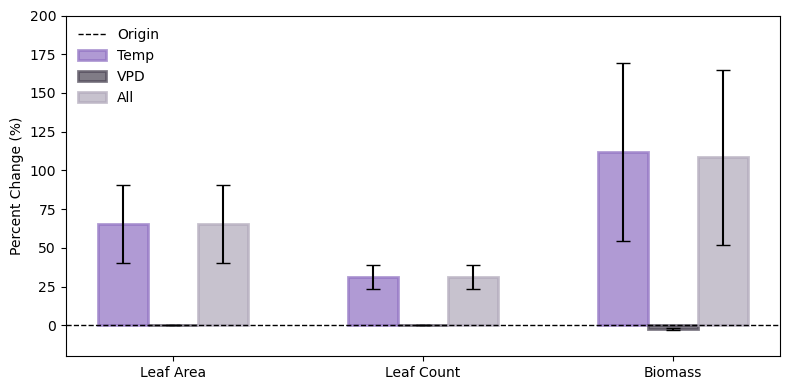

In [51]:
plot_leaf_data_percent_change_median_with_mad(output_file)

In [54]:
function plot_leaf_data_all_versions(results_file::String)
    df = CSV.read(results_file, DataFrame)
    versions = ["Origin", "Temp", "VPD", "All"]
    colors = ["purple", "#8F70C2", "#4A4453", "#B0A8BA"]
    linestyles = [":", "--", "-.", "-"] 

    
    fig, ax1 = PyPlot.subplots(figsize=(10, 6))

    bar_width = 0.15
    offset = -1.5 * bar_width 

    # 엽면적
    for (i, version) in enumerate(versions)
        version_data = filter(row -> row.version == version, df)
        ax1.bar([year + offset + (i-1) * bar_width for year in version_data.year],
                version_data.leaf_area_on_may_15,
                width=bar_width,
                label="Leaf Area ($version)",
                color=colors[i],
                alpha=0.7)
    end
    ax1.set_xlabel("Year")
    # ax1.set_ylabel(L"Leaf Area (cm^2)", color="black")
    ax1.set_ylabel("Leaf Area (cm^2)", color="black")
    ax1.tick_params(axis="y", labelcolor="black")
    ax1.set_ylim(0, 600)
    ax1.set_xticks(df.year)
    ax1.set_xticklabels(df.year)
    
    # 엽 수
    ax2 = ax1.twinx()
    for (i, version) in enumerate(versions)
        version_data = filter(row -> row.version == version, df)
        ax2.plot(version_data.year,
                 version_data.leaves_on_may_15,
                 label="Leaf Count ($version)",
                 color=colors[i],
                 linestyle=linestyles[i],
                 marker="o",
                 alpha=0.5)
    end
    ax2.set_ylabel("Final Leaf Count", color="black")
    ax2.tick_params(axis="y", labelcolor="black")
    ax2.set_ylim(0, 12)

    handles1, labels1 = ax1.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()
    all_handles = vcat(handles1, handles2)
    all_labels = vcat(labels1, labels2)

    fig.legend(all_handles, all_labels, loc="upper left", bbox_to_anchor=(0.125, 0.875), frameon=false, ncol=2)

    PyPlot.show()
    fig.savefig("output_year.png", dpi=300) 
end

plot_leaf_data_all_versions (generic function with 1 method)

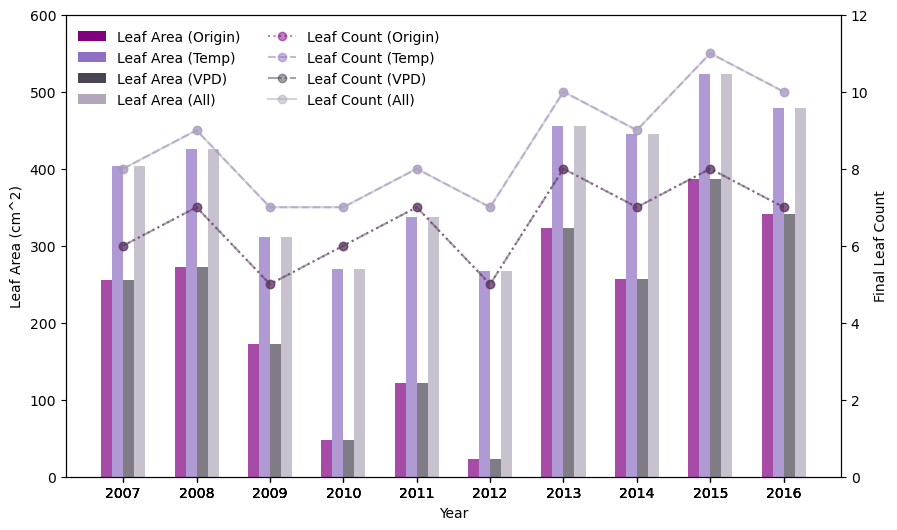

In [55]:
plot_leaf_data_all_versions(output_file)